# House Price Prediction<br>

# Problem Statement:<br>
### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

# Business Goal:<br>
### Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house.

This notebook is divided into four parts:<br>
 1) Data Understanding<br>
 2) EDA<br>
 3) Data Preparation & Feature Engineering<br>
 4) Model Building & Evaluation

## 1. Data Understanding

In [1]:
## Mount Google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
## Install packages and import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
import random

In [3]:
## import dataset

df=pd.read_csv('/content/drive/MyDrive/UpGrad/House_price_prediction_Australia/train.csv')

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Here, we have total 81 columns and 1460 observations in which some columns have missing values.<br>
Here, we don't require id column so we will drop it from our dataframe with those columns which have beyond 20% missing values.

In [6]:
## Let's check each column with its unique values and if found inappropriate dtype we will change it

{column:df[column].unique() for column in df}

{'Id': array([   1,    2,    3, ..., 1458, 1459, 1460]),
 'MSSubClass': array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
        180,  40]),
 'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
 'LotFrontage': array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
         91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
         74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
         81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
         77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
         92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
         67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
         87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
         38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
        114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
         4

In [7]:
## Handling missing values
df.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [8]:
## Get column names which have beyong 20% missing values
def get_columns_with_missing_values(df, threshold=0.2):
    missing_percentages = df.isnull().mean()
    columns_with_missing_values = missing_percentages[missing_percentages > threshold].index.tolist()
    return columns_with_missing_values

# Assuming your dataframe is named 'df'
columns_with_missing = get_columns_with_missing_values(df)
print(columns_with_missing)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [9]:
## drop unnecessary columns from dataframe
df=df.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Now, Here we have 37 numeric columns and 38 categorical columns

In [11]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [12]:
## We will update data types  and also map for the below columns:
## Here, we keep overall quality and condition columns as it is in integer form because integers are in ordered.
## For MSSubClass converting to categories:

df['MSSubClass']=df['MSSubClass'].map({20:'A',30:'B',40:'C',45:'D',50:'E',60:'F',70:'G',75:'H',80:'I',85:'J',90:'K', 120:'L',150:'M',160:'N',180:'N',190:'O'})


In [13]:
## mapping MoSold month to string categories mean month:
df['MoSold']=df['MoSold'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

In [14]:
## Imputation

### before imputing we will check descriptive statistics of numeric features
df.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082     6.099315     5.575342  1971.267808   
std      24.284752    9981.264932     1.382997     1.112799    30.202904   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      59.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      69.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      80.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.685262   443.639726    46.549315   567.240411  ...   
std       20.645407   181.066207   456.098091   161.319273   441.866955  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   166.000000   712.250000     0.000000   808.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
25%       0.000000     0.000000      0.000000  2007.000000  129975.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
75%       0.000000     0.000000      0.000000  2009.000000  214000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

Here, Sales price for house in our dataset ranges from 34990 to 755000 $.

In [15]:
### Now, for imputation we will check descriptive statistics for those numeric columns which have missing values.

df_missing_num=df[['LotFrontage','MasVnrArea']]
df_missing_num.describe()

LotFrontage   MasVnrArea
count  1201.000000  1452.000000
mean     70.049958   103.685262
std      24.284752   181.066207
min      21.000000     0.000000
25%      59.000000     0.000000
50%      69.000000     0.000000
75%      80.000000   166.000000
max     313.000000  1600.000000

Here, LotFrontage column shows normal distribution of data while MasVnrArea shows highly skewed distribution. <br>
So we will impute LotFrontage with mean and MasVnrArea with median value

In [16]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())

Now, for all categorical columns we will check value_counts for those columns in which one category has high value - we will impute it with mode and other columns with 'None'

In [17]:
df_missing_cat=df[['GarageCond','GarageType','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual',
                   'BsmtCond','BsmtFinType1','MasVnrType','Electrical']]

In [18]:
for column in df_missing_cat.columns:
  print(df_missing_cat[column].value_counts())

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [19]:
for column in df_missing_cat.columns:
  df[column]=df[column].fillna(df[column].mode()[0])

In [20]:
## Imputing for GarageYrblt:
df['GarageYrBlt'].value_counts().head(10)

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
Name: GarageYrBlt, dtype: int64

In [21]:
## Here, we will randomly impute from most occurring year values
df['GarageYrBlt']=df['GarageYrBlt'].apply(lambda x:random.choice([2003.0,2004.0,2005.0,2006.0,2007.0]) if pd.isnull(x) else x)

In [22]:
## Now, convert GarageYrBlt data type to int from float
df['GarageYrBlt']=df['GarageYrBlt'].astype(int)

In [23]:
## Now check missing values in dataframe
df.isnull().sum().sort_values(ascending=False).head(25)

MSSubClass       0
GarageYrBlt      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageFinish     0
HeatingQC        0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## 2. EDA

#### Uni-variate analysis for numeric variables

In [25]:
## Create dataframe with all numeric features
df_num=df.select_dtypes(exclude='object')

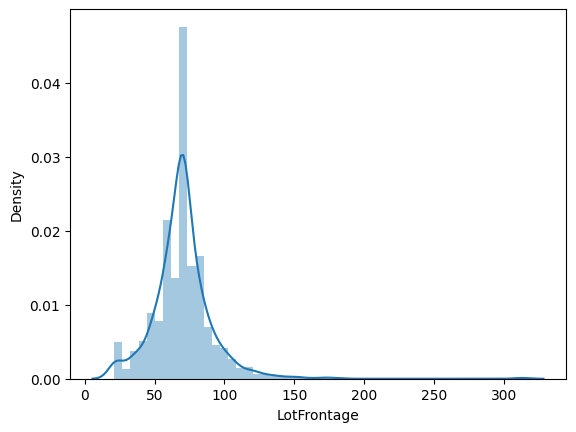

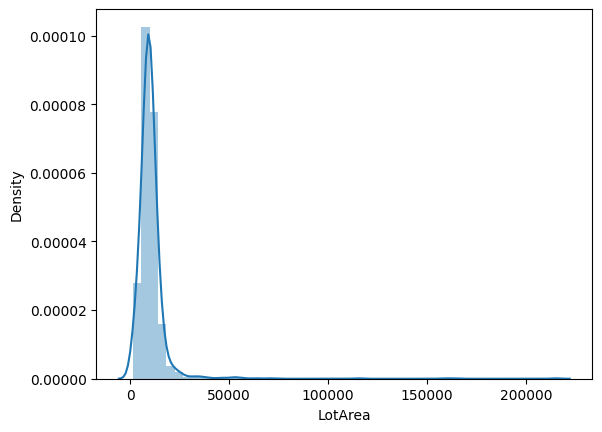

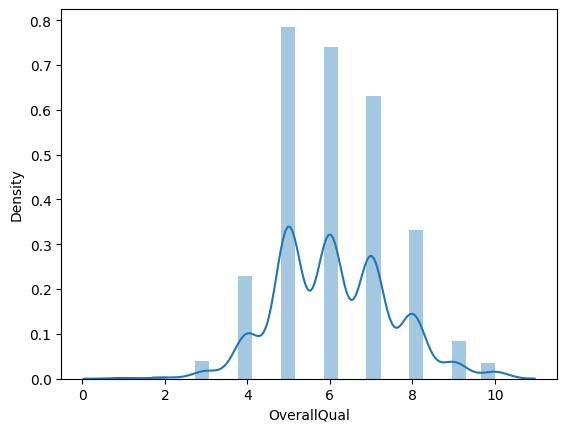

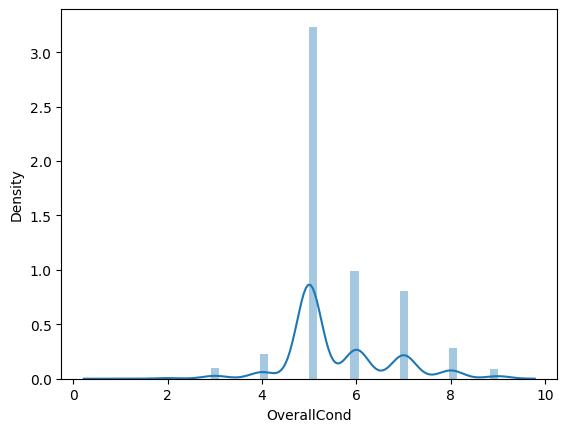

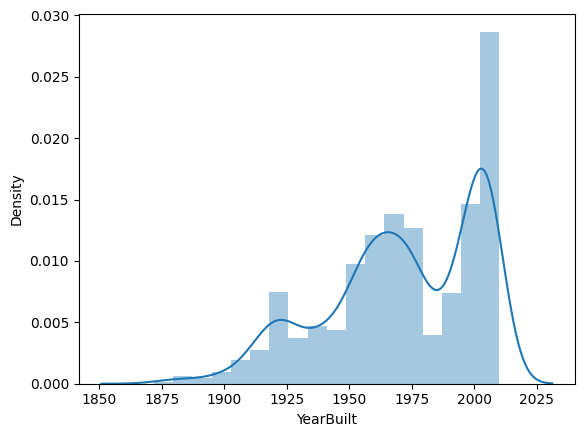

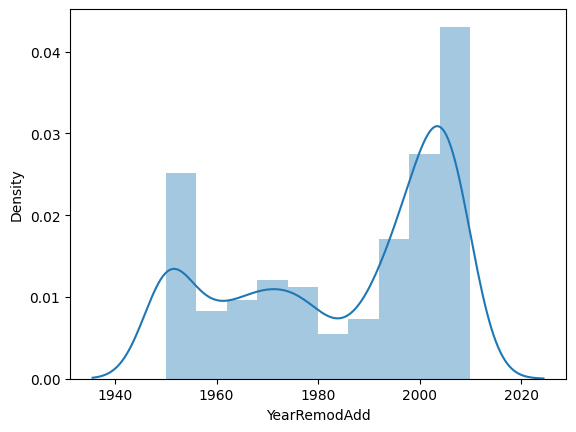

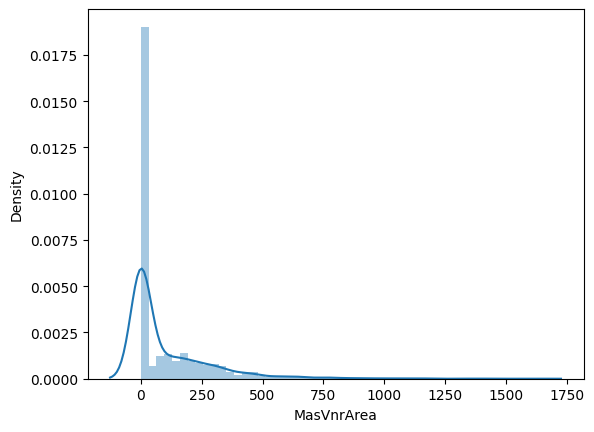

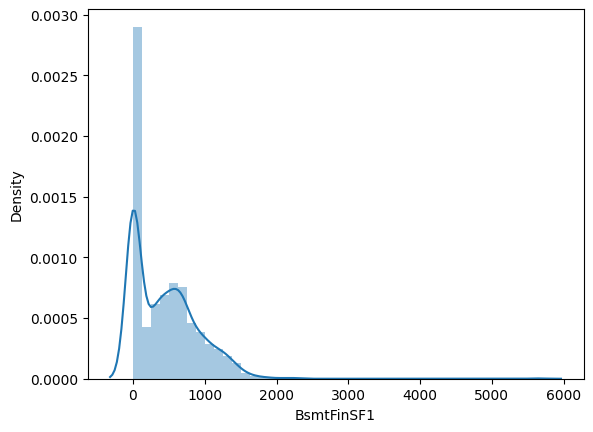

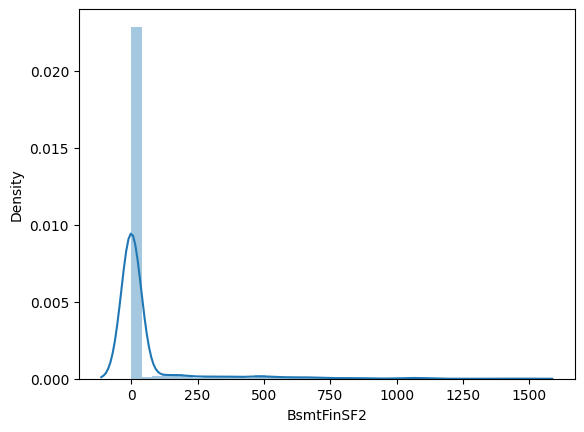

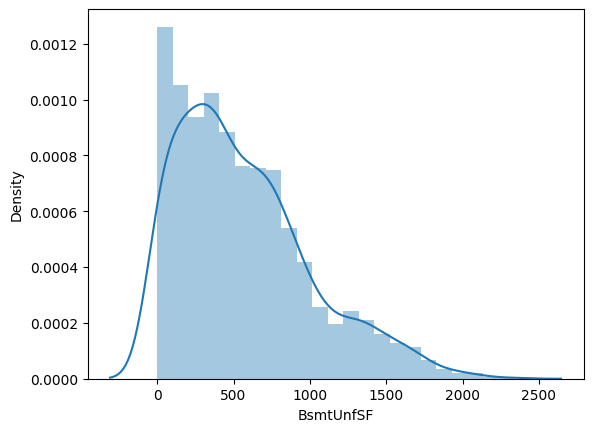

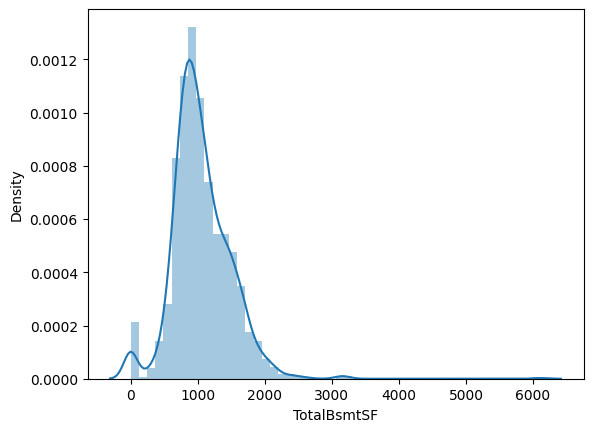

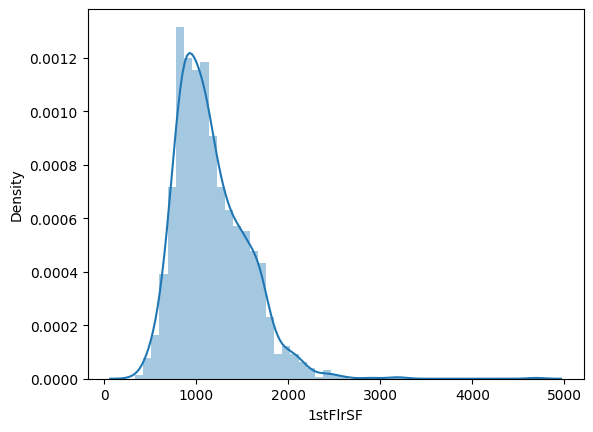

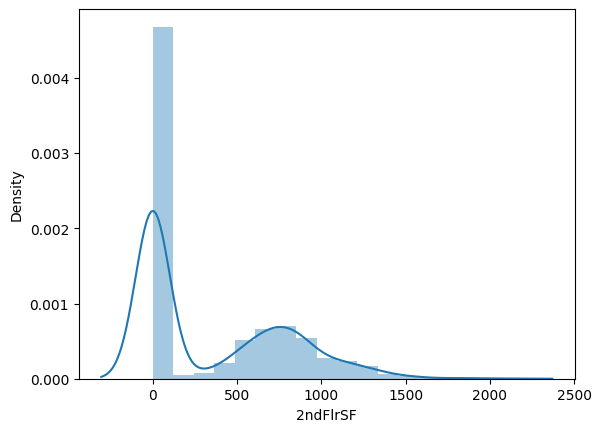

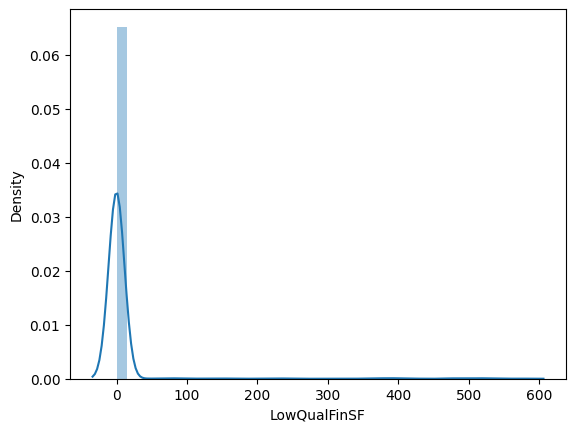

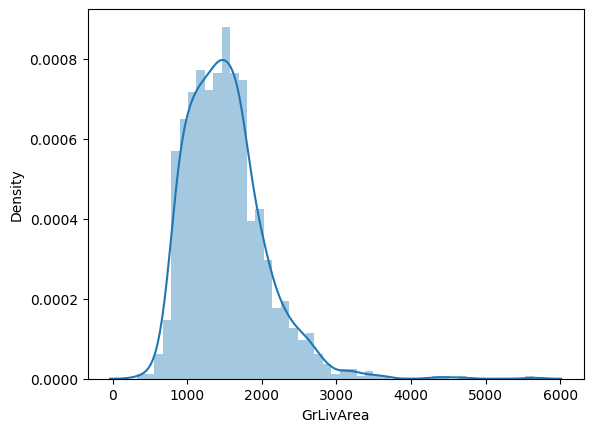

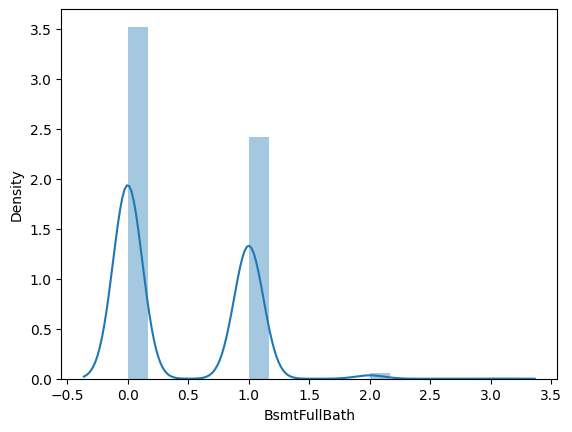

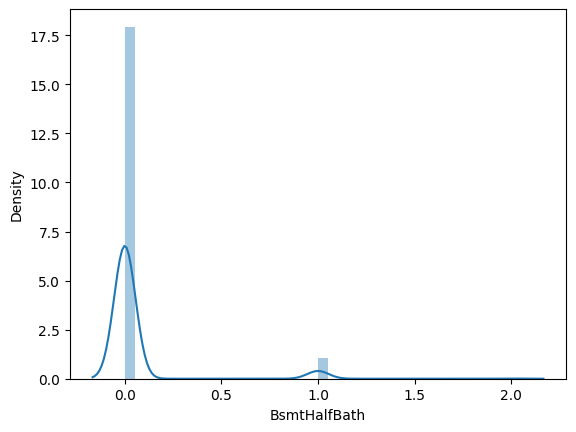

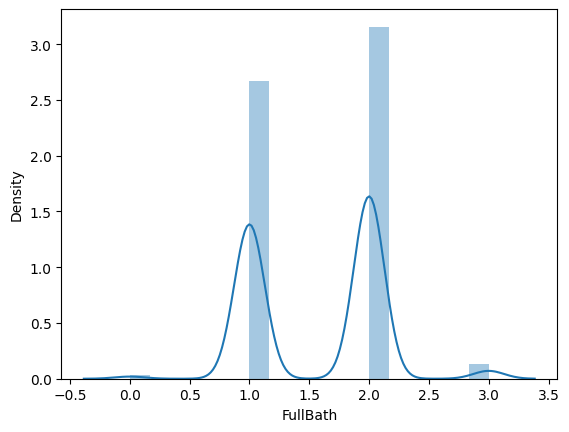

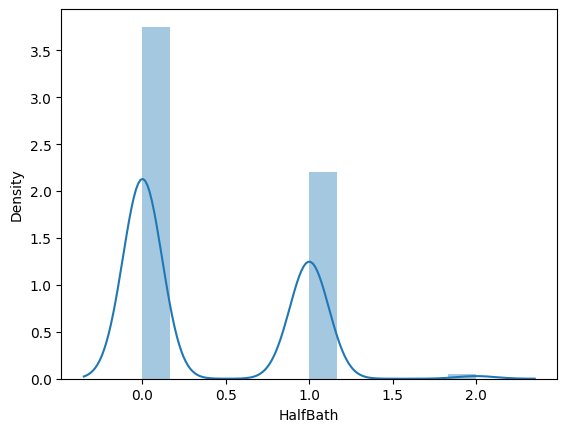

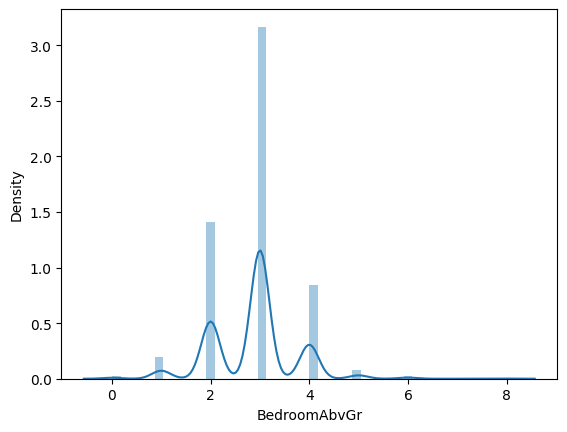

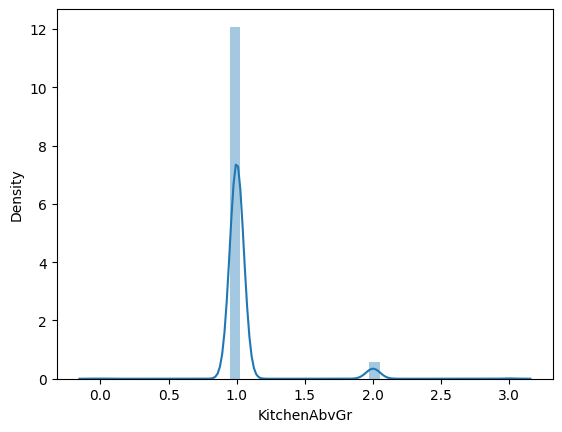

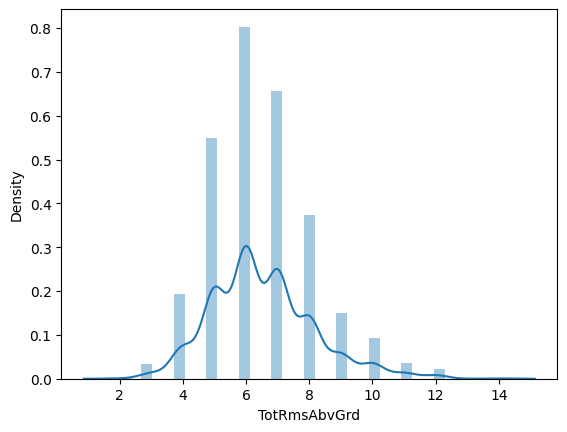

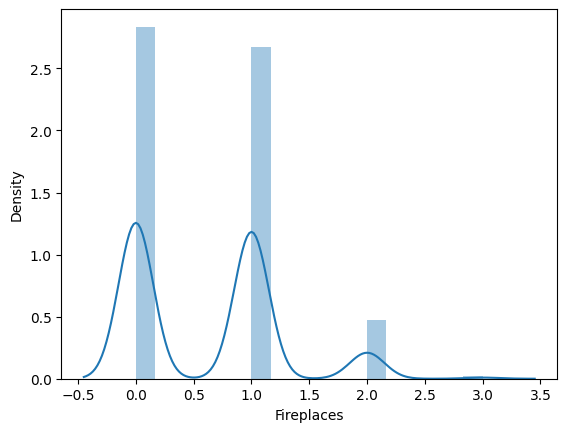

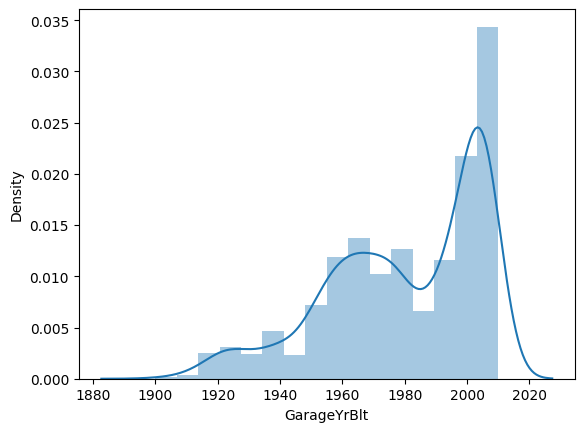

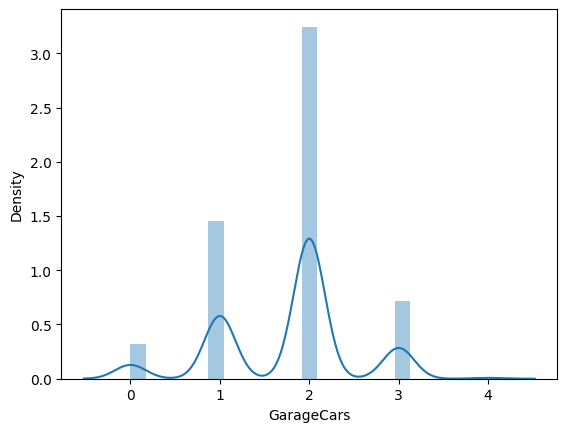

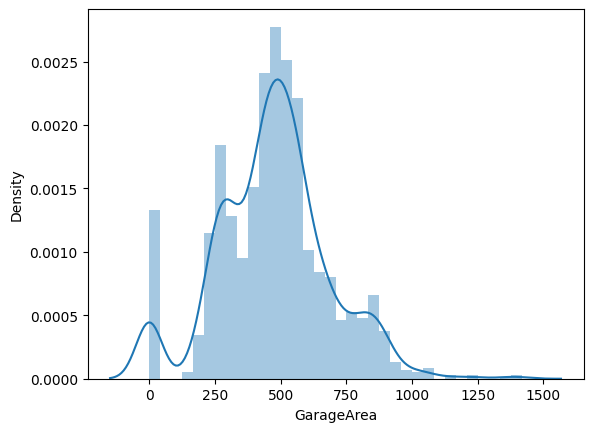

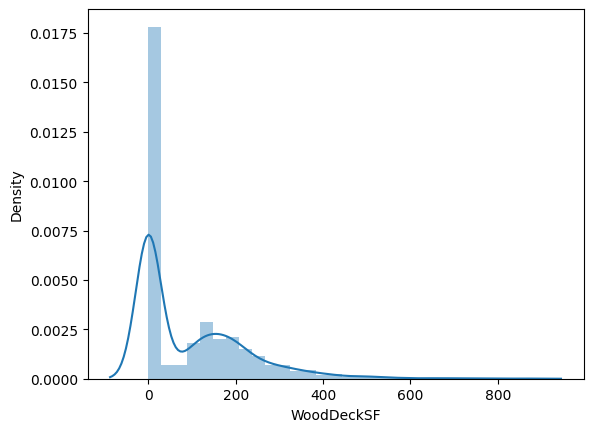

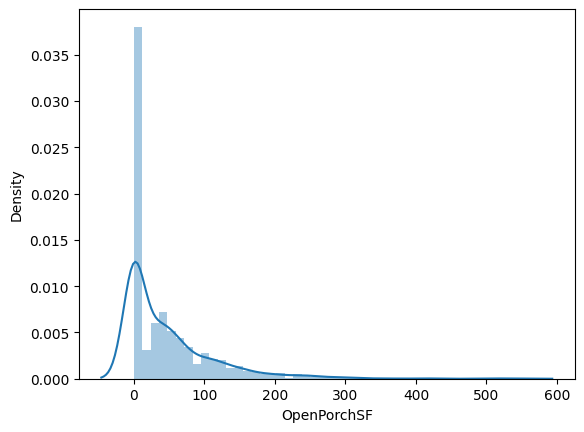

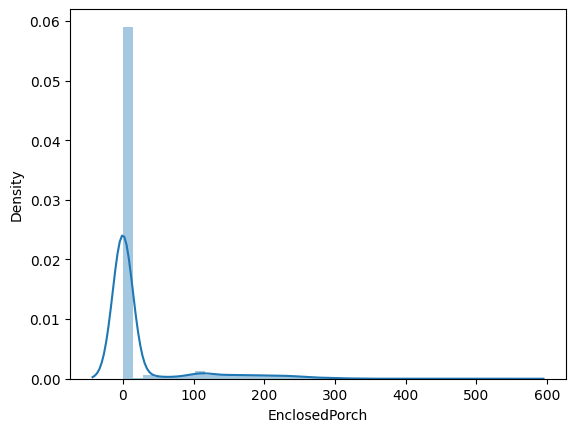

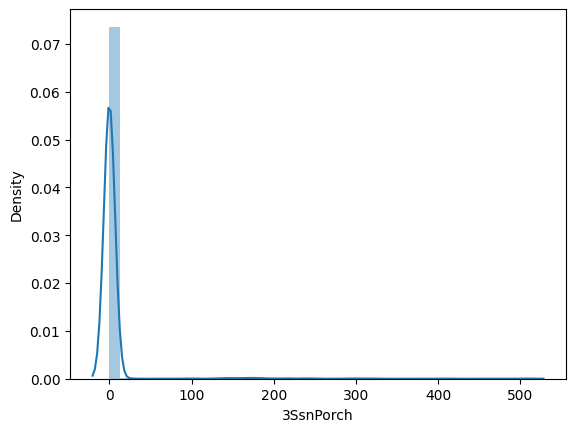

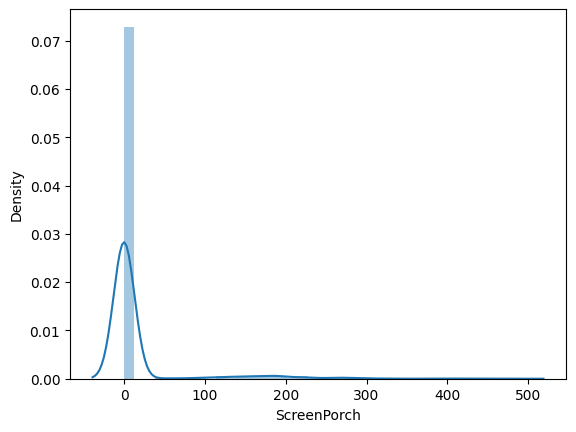

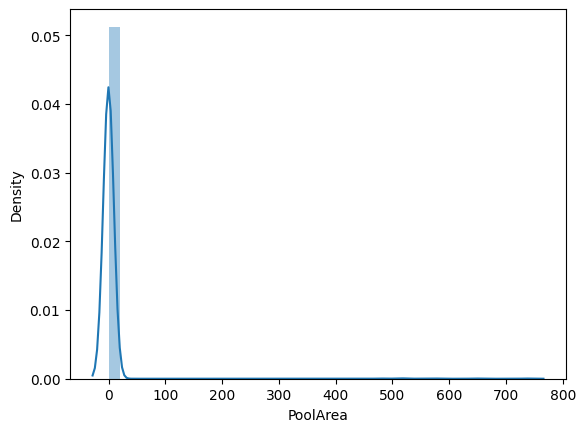

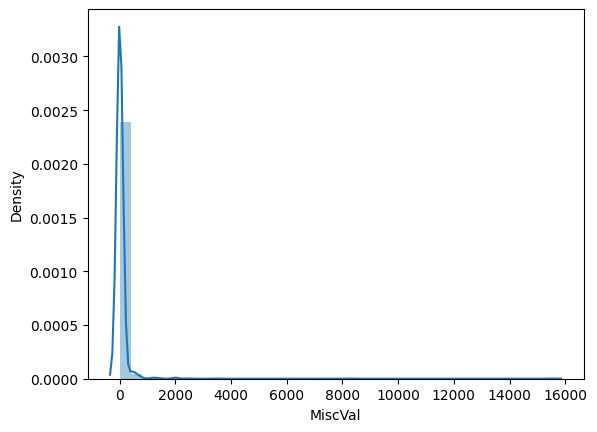

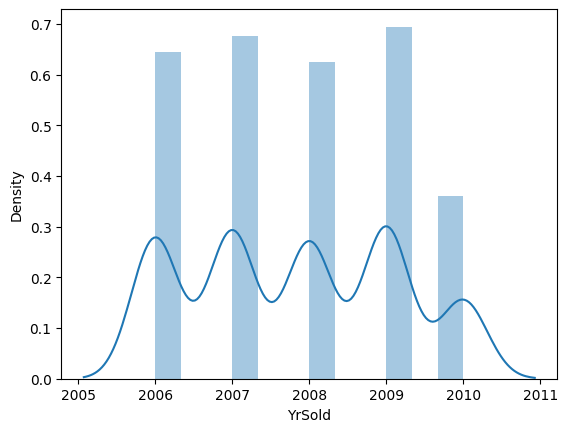

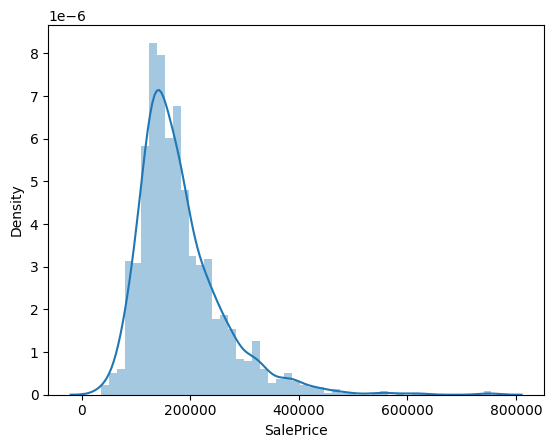

In [26]:
for column in df_num.columns:
  sns.distplot(df[column])
  plt.show()

#### Uni-variate analysis for categorical columns

In [27]:
## create dataframe with categorical columns
df_cat=df.select_dtypes(include='object')

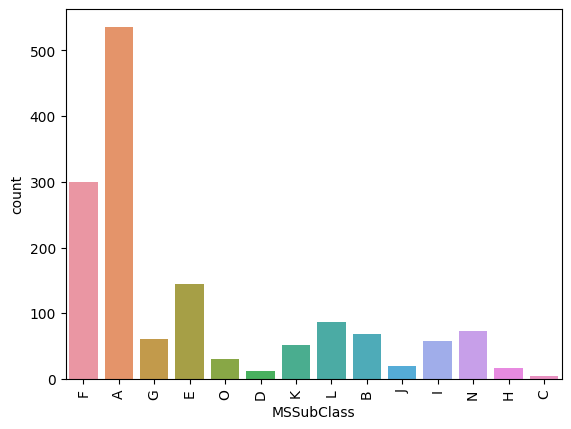

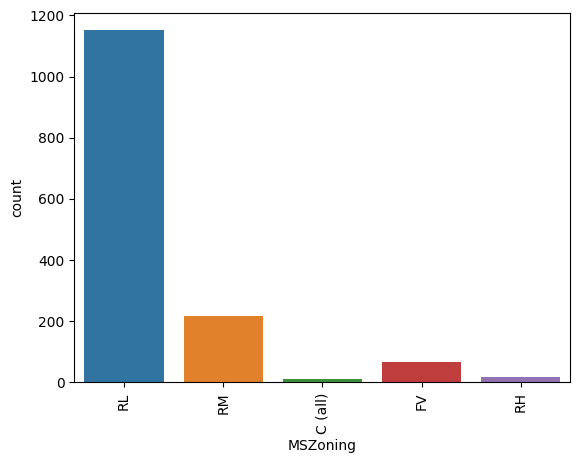

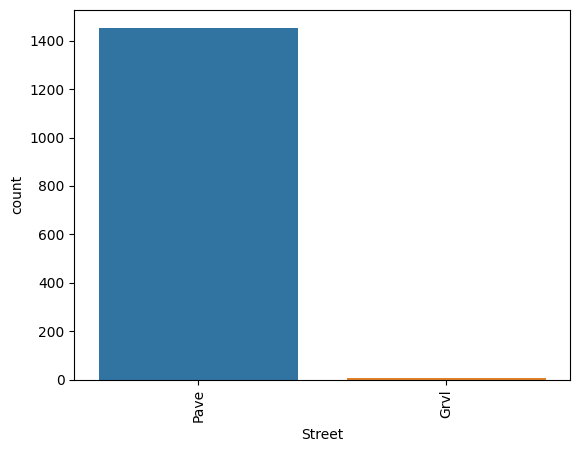

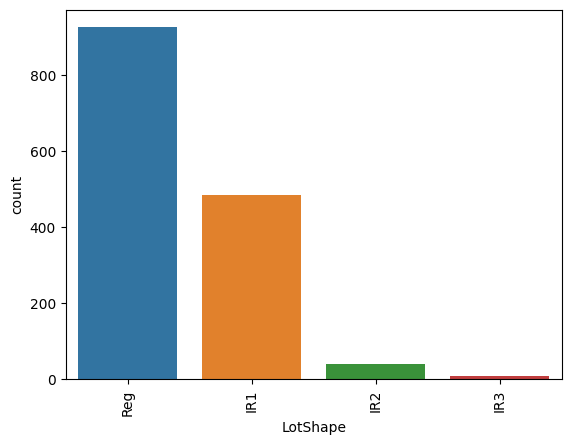

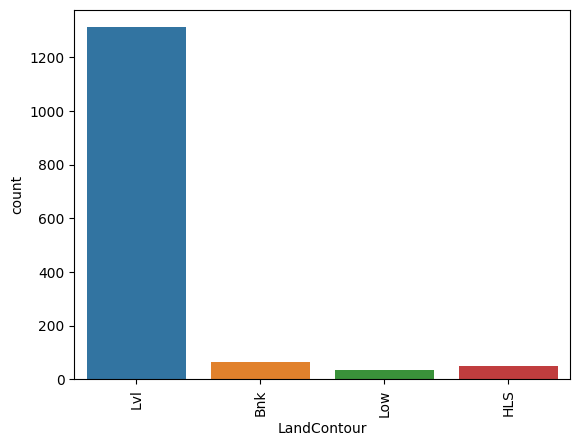

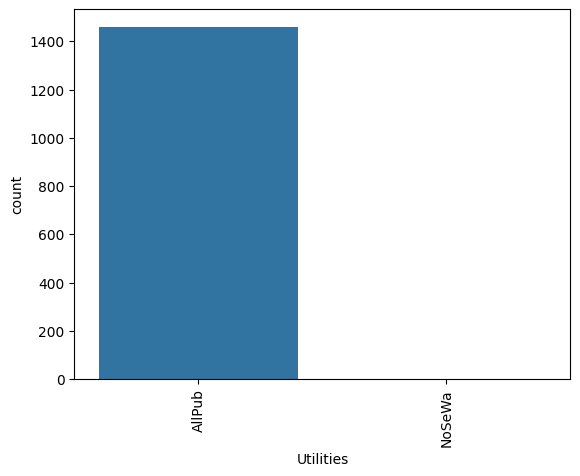

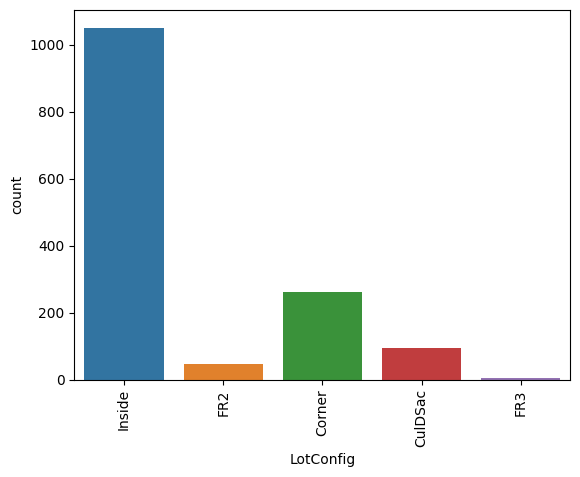

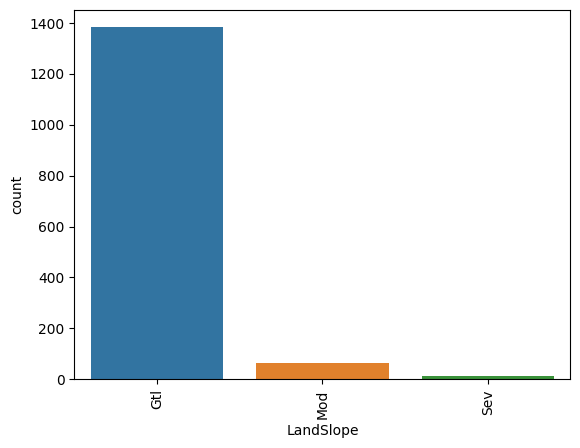

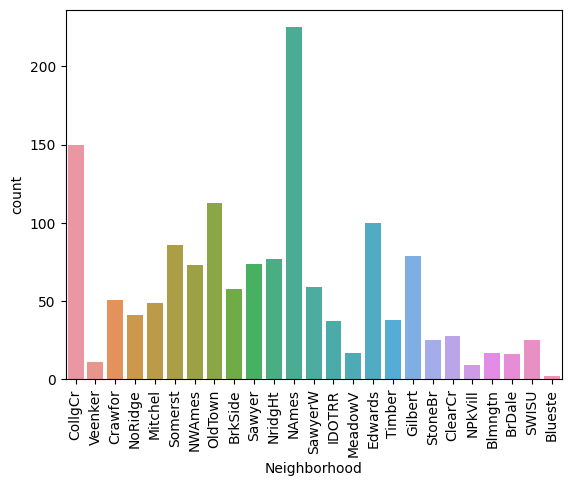

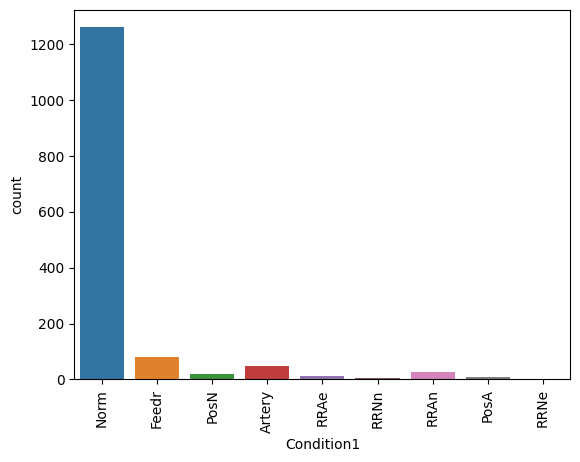

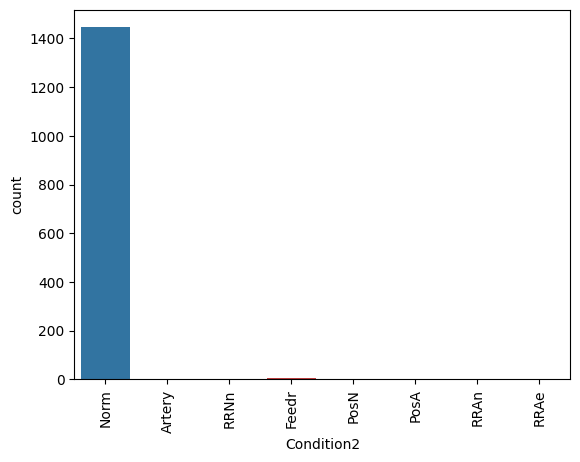

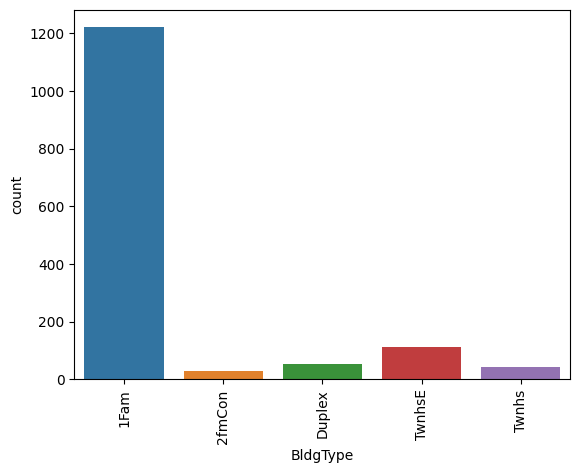

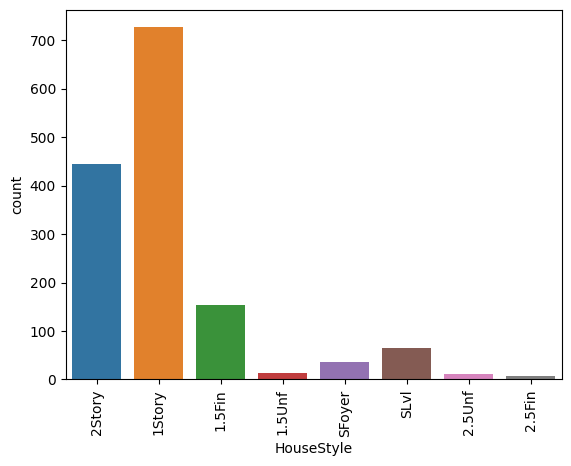

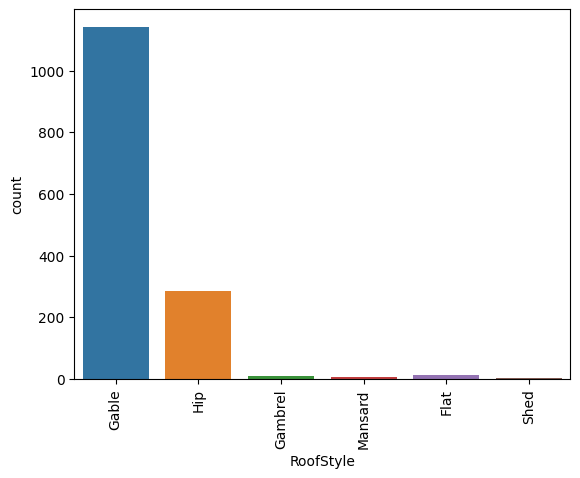

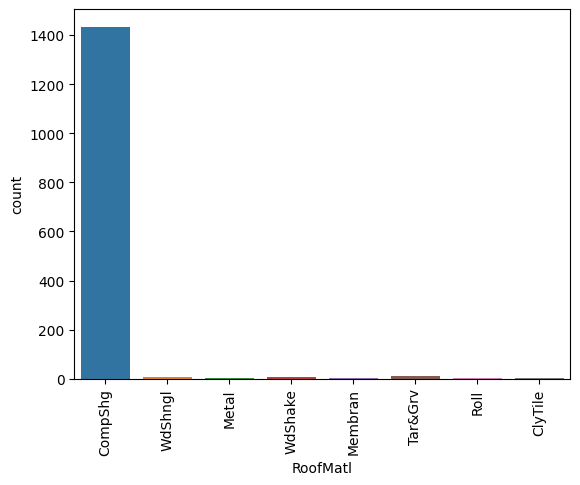

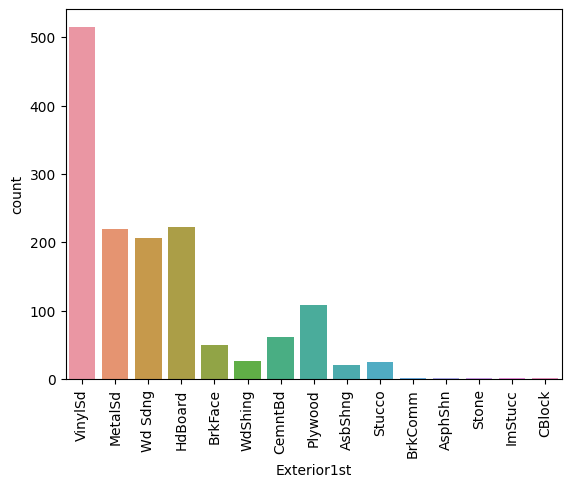

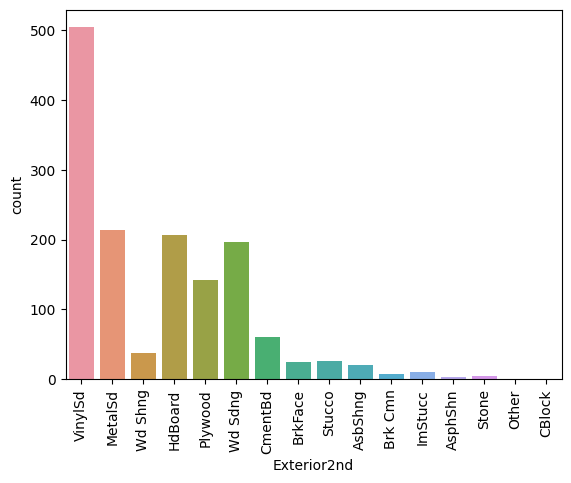

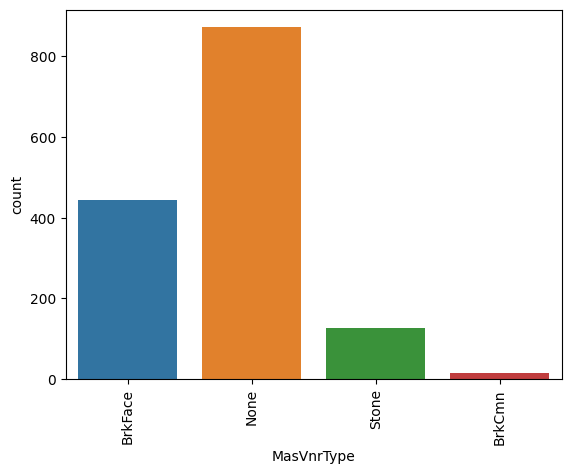

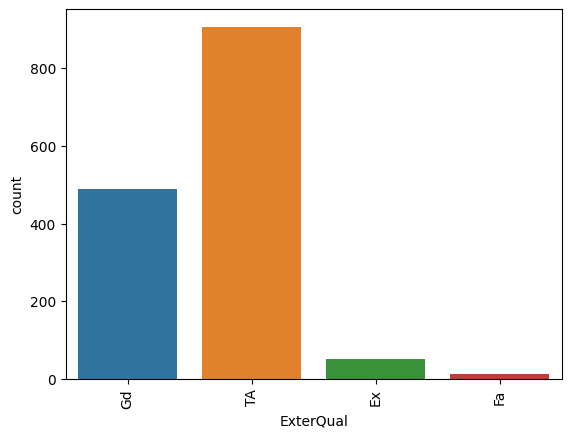

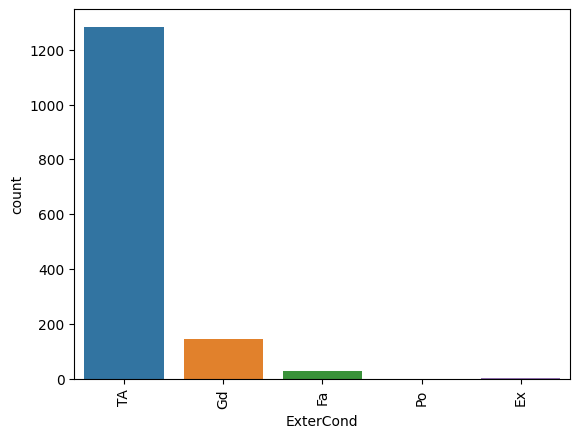

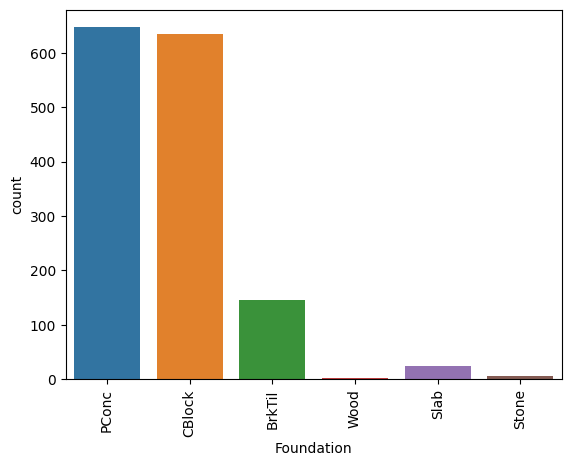

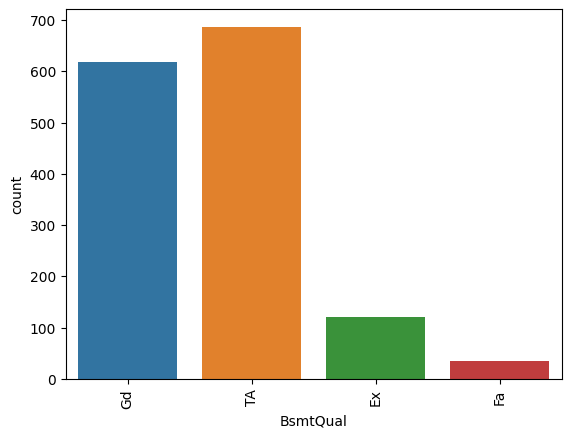

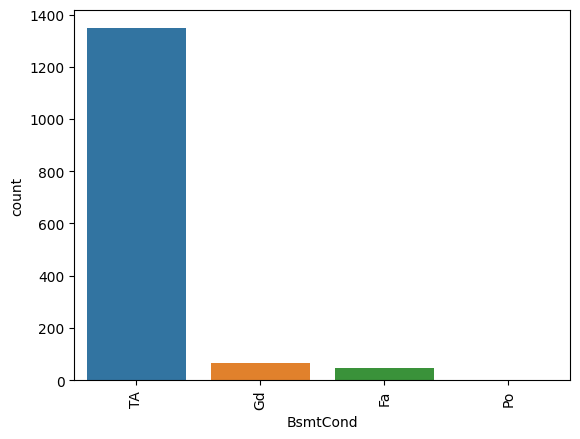

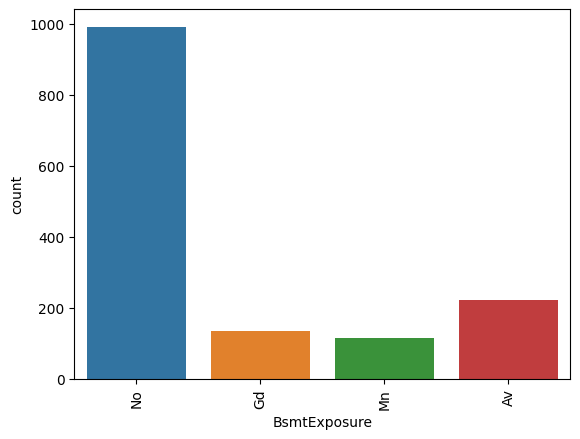

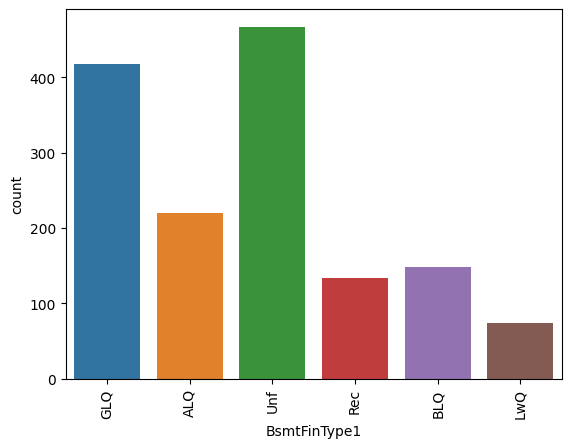

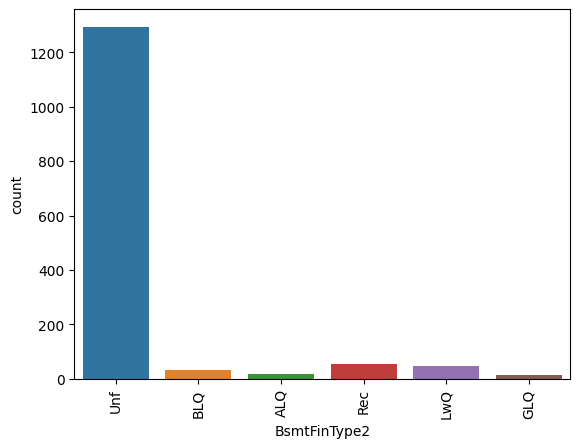

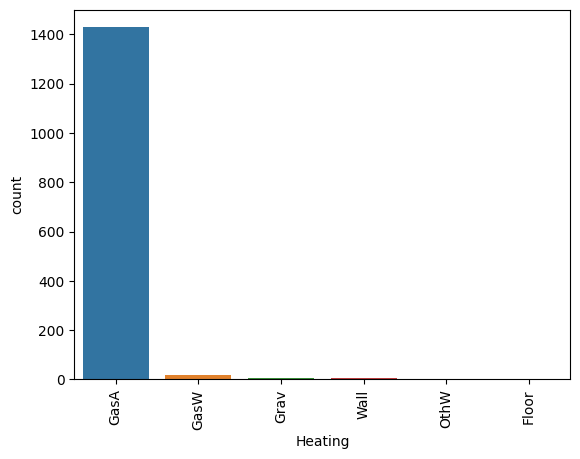

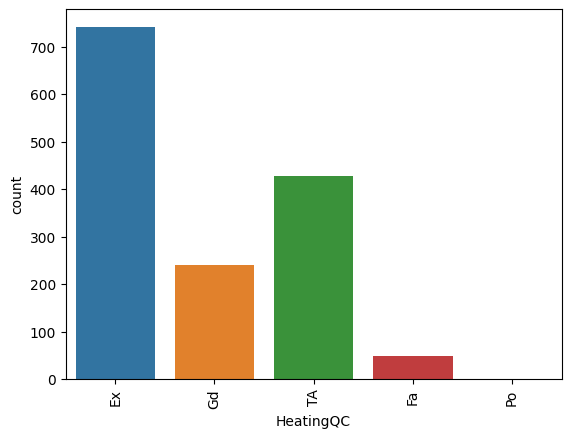

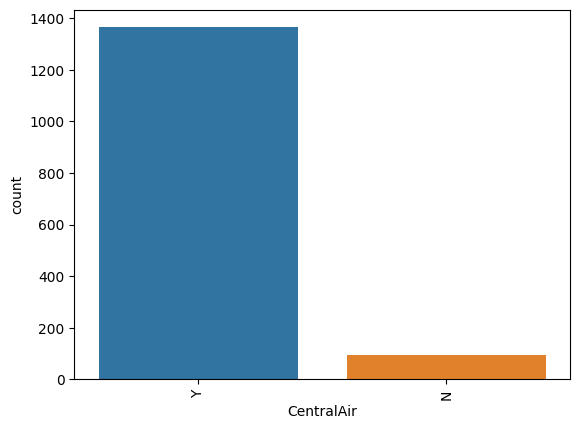

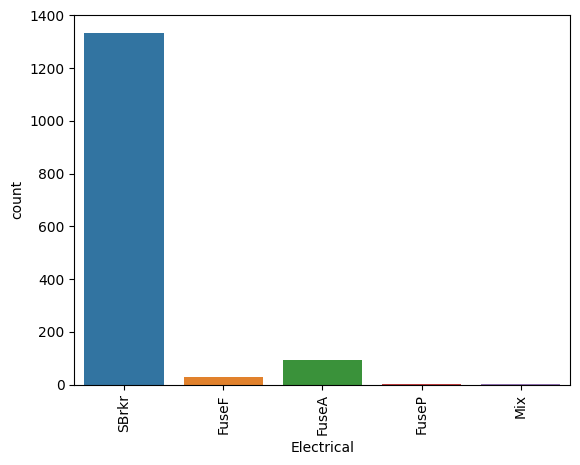

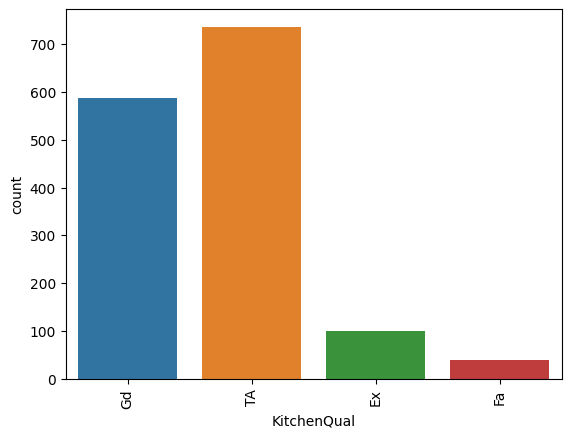

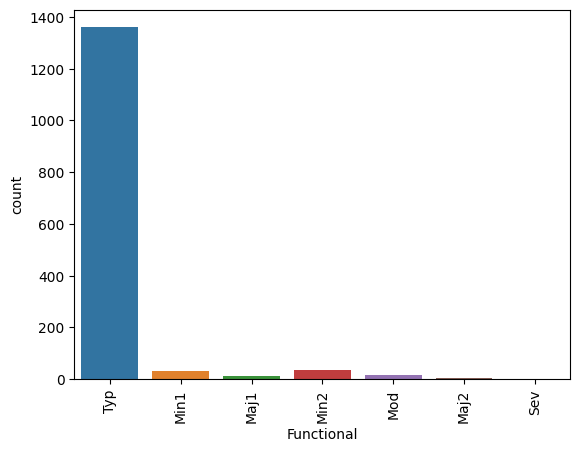

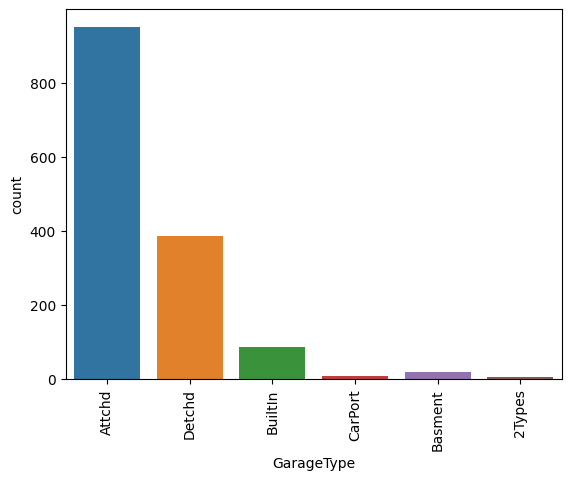

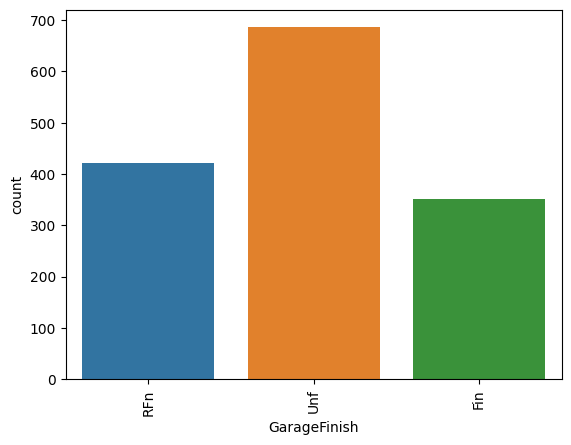

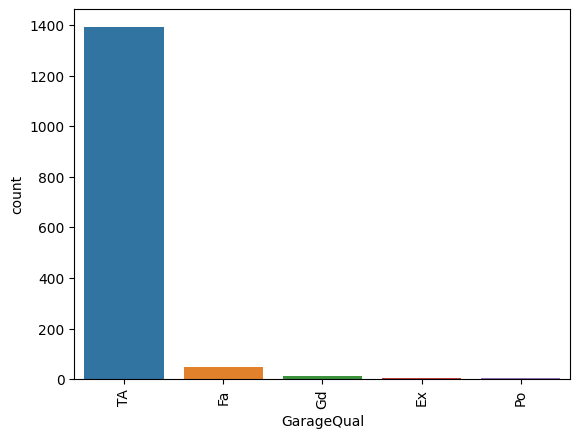

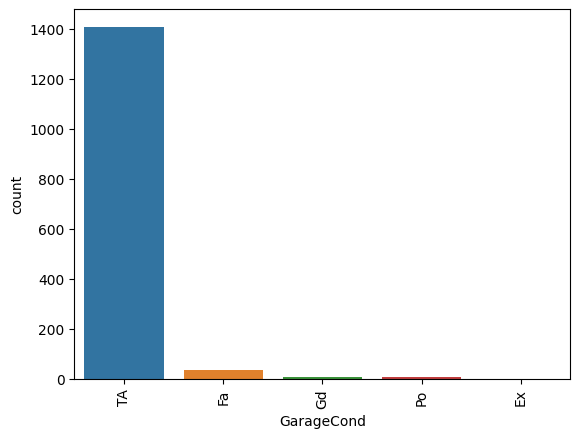

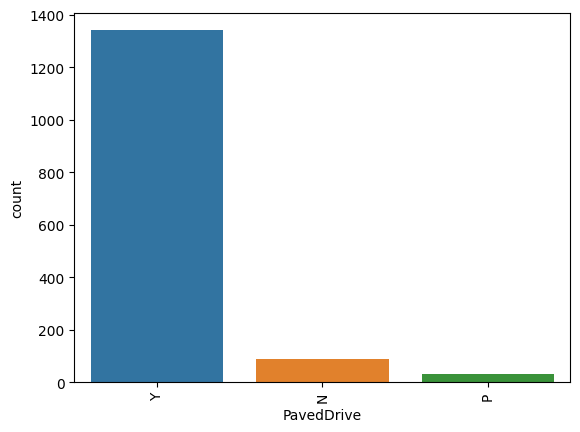

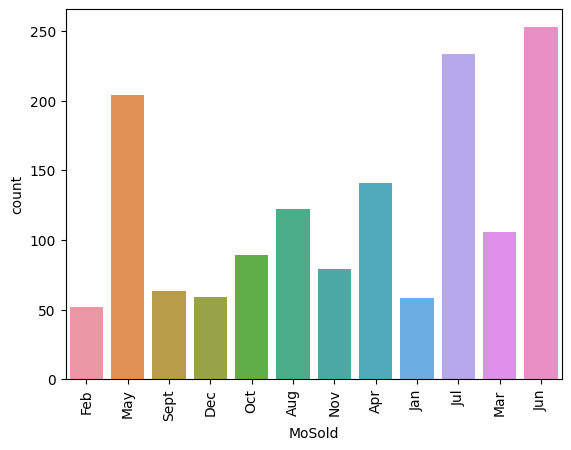

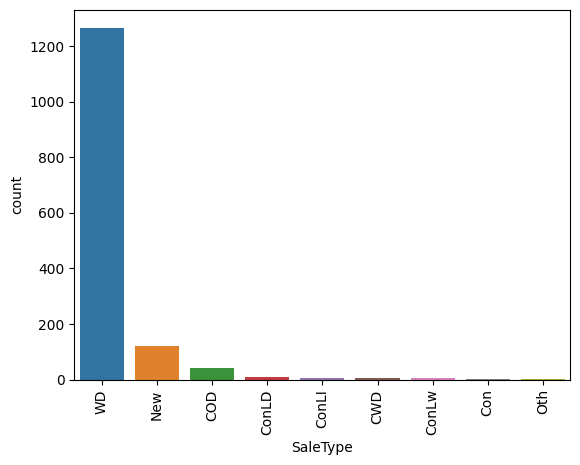

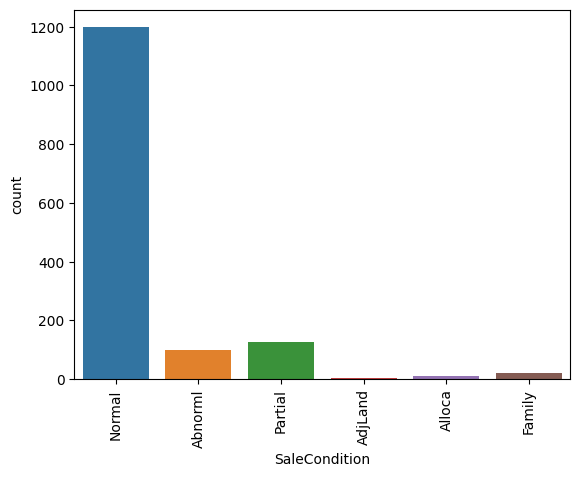

In [28]:
for column in df_cat.columns:
  sns.countplot(data=df,x=column)
  plt.xticks(rotation=90)
  plt.show()

#### Bi-variate Analysis of categorical variable with SalePrice

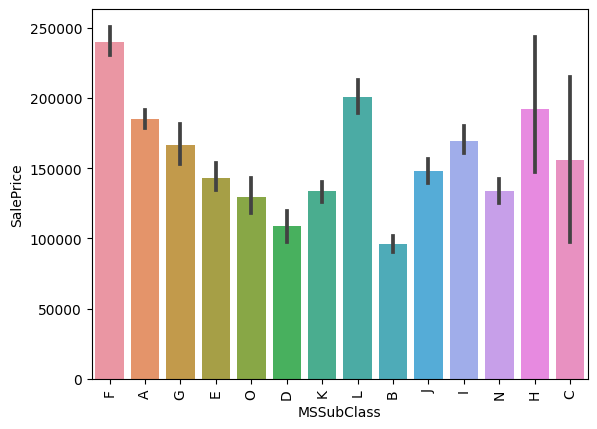

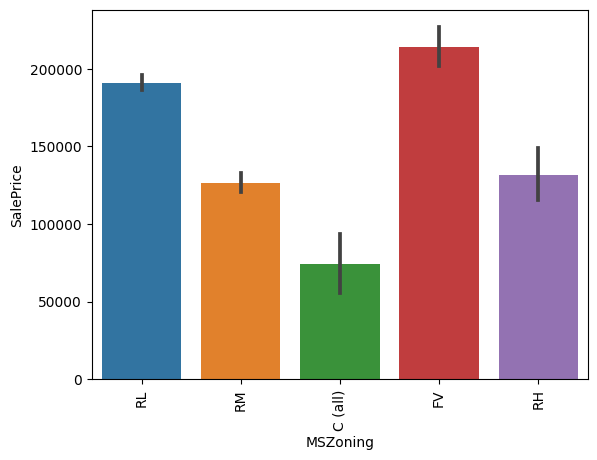

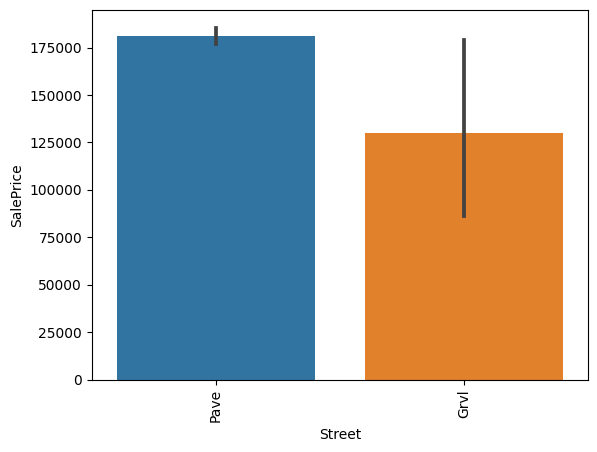

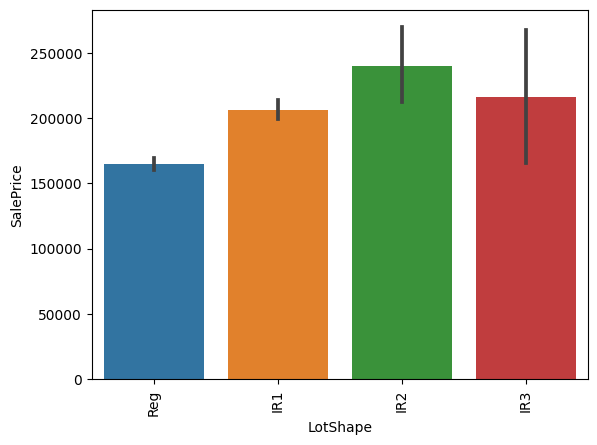

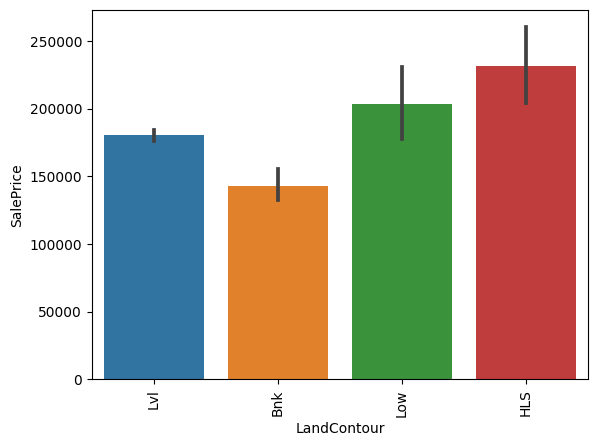

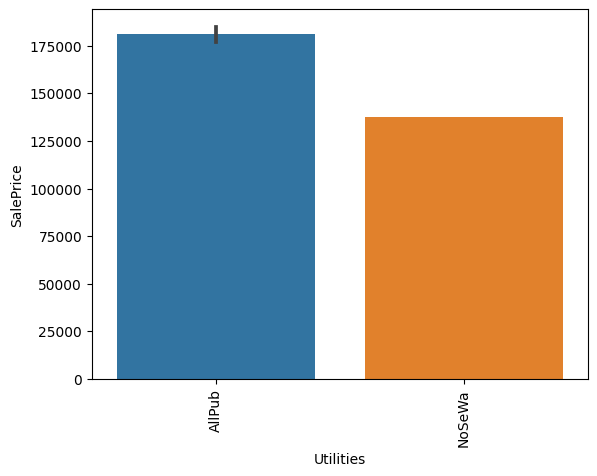

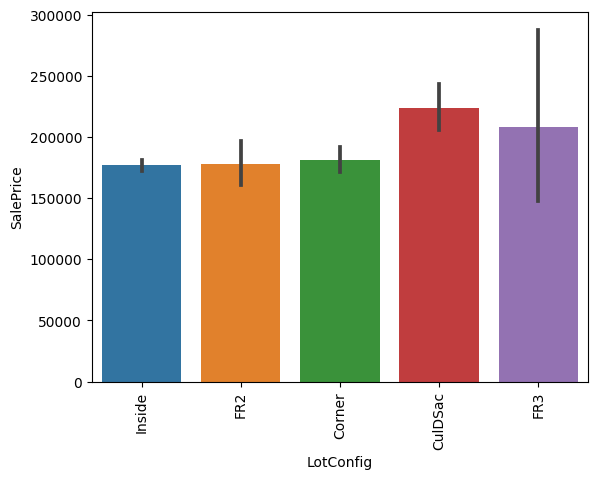

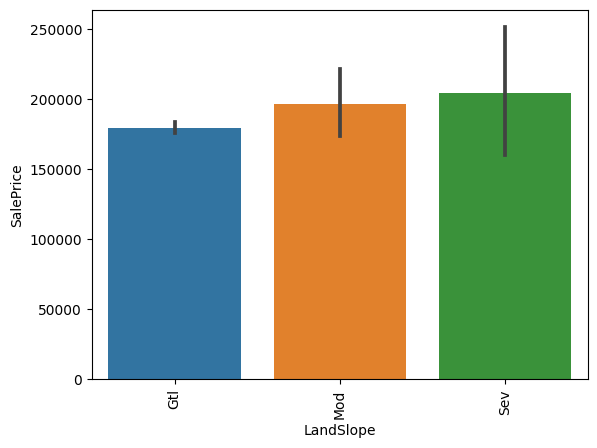

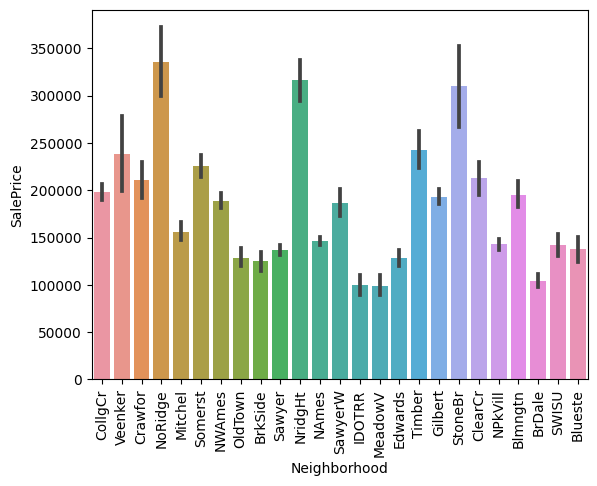

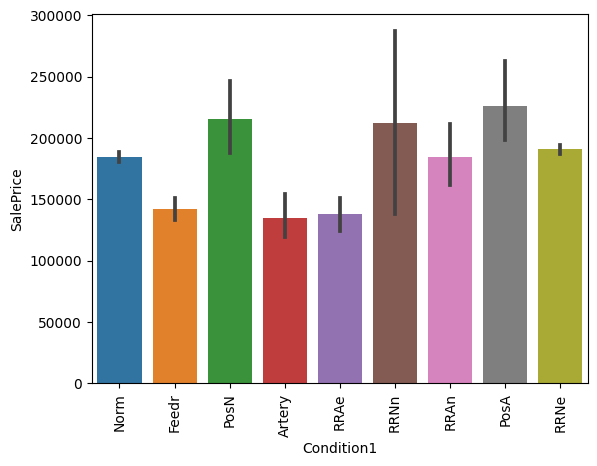

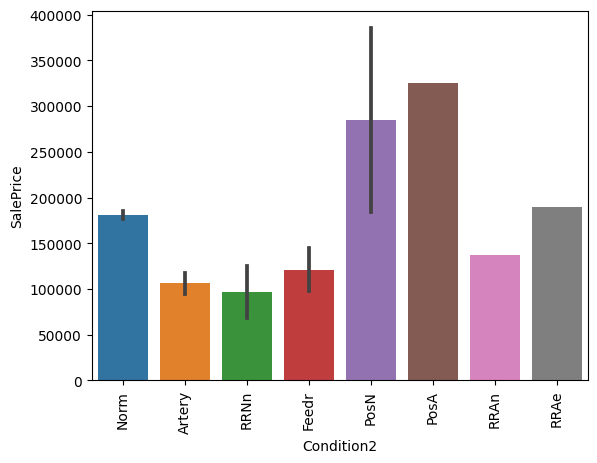

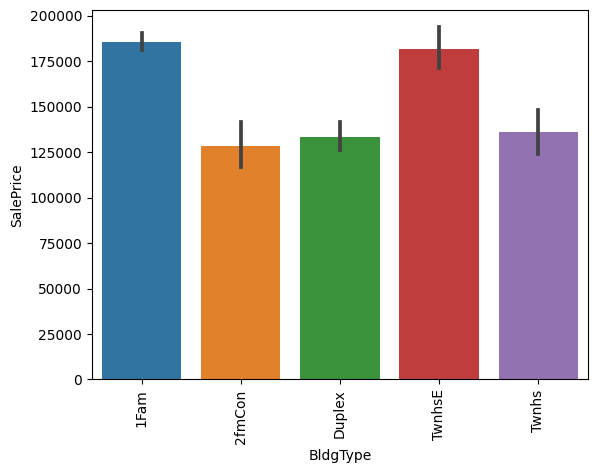

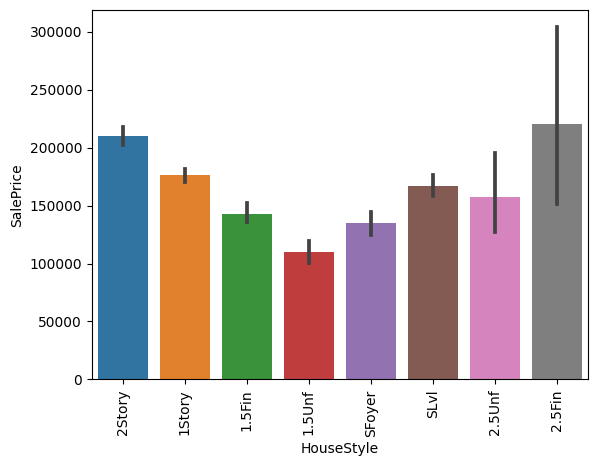

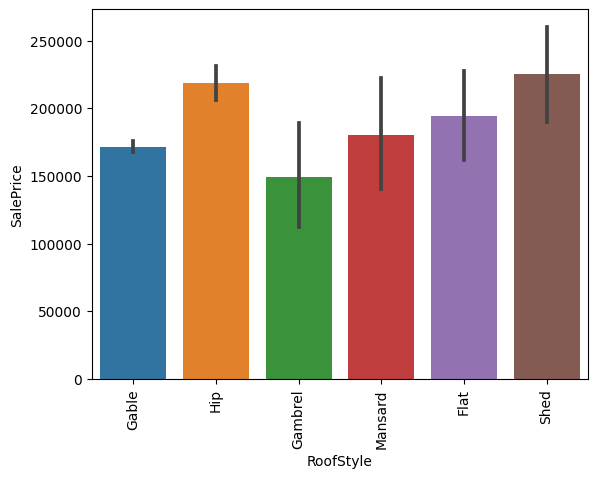

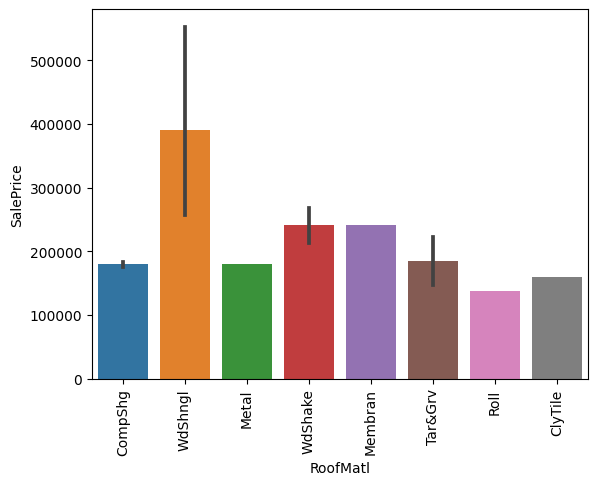

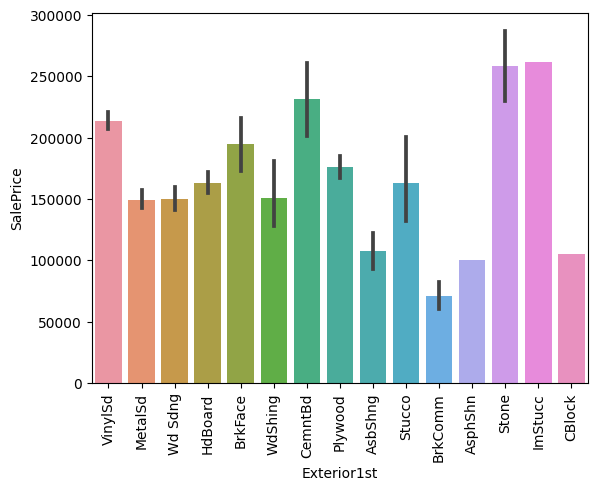

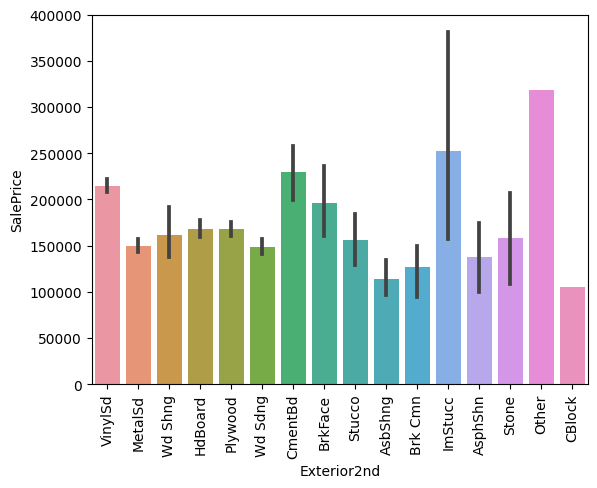

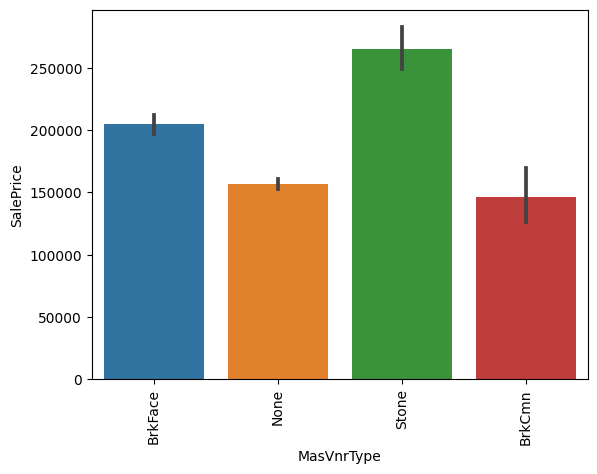

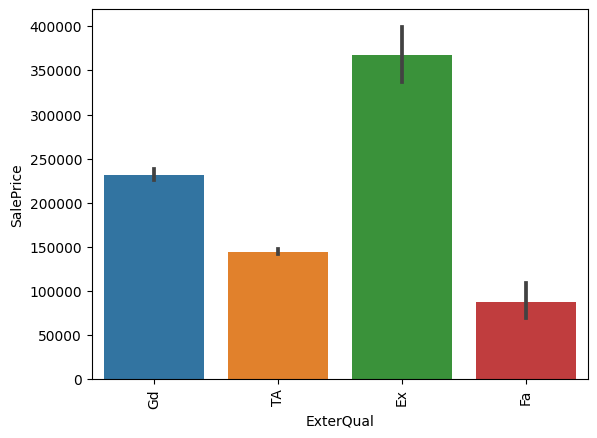

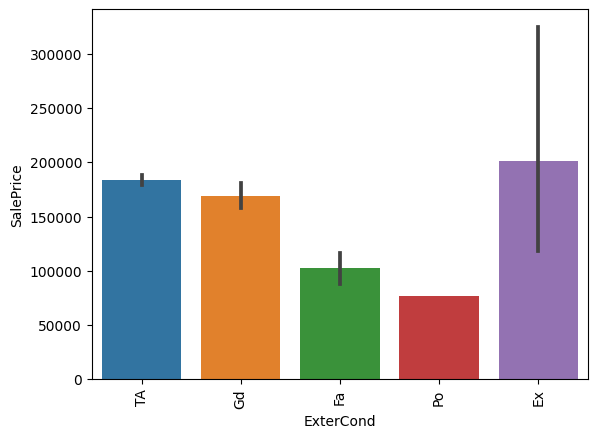

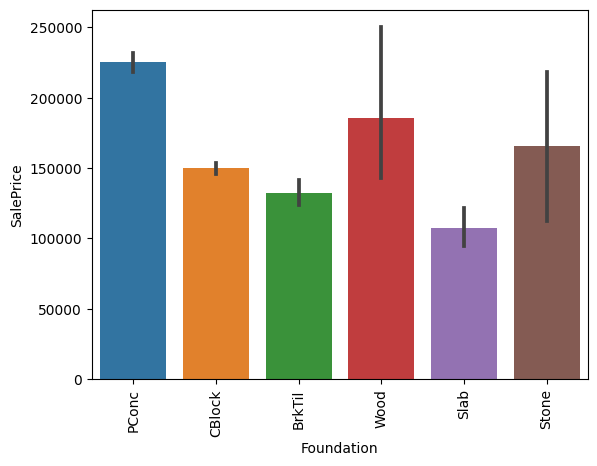

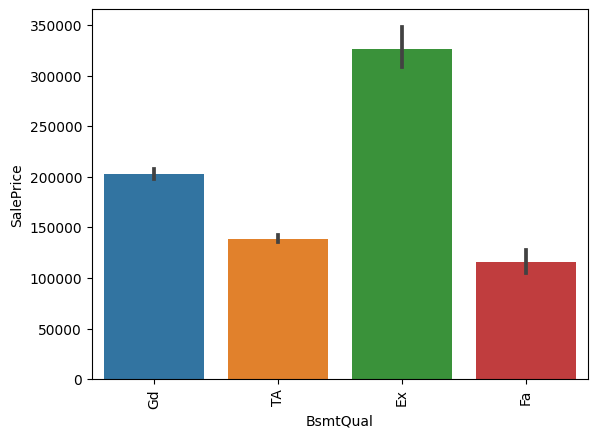

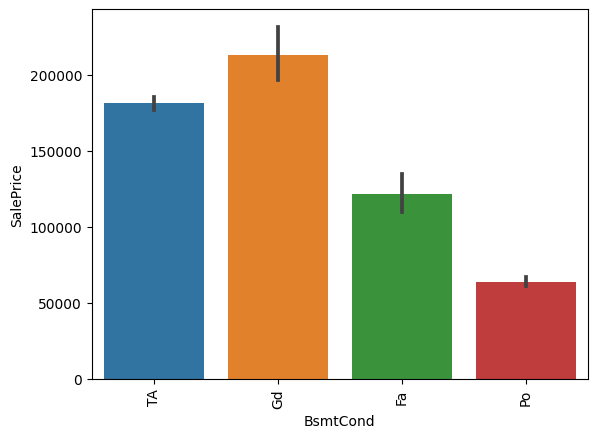

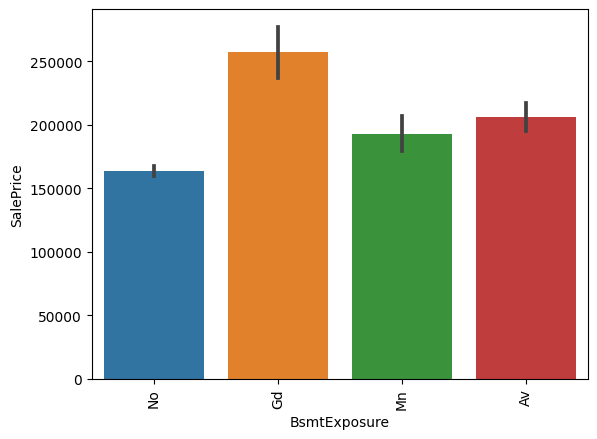

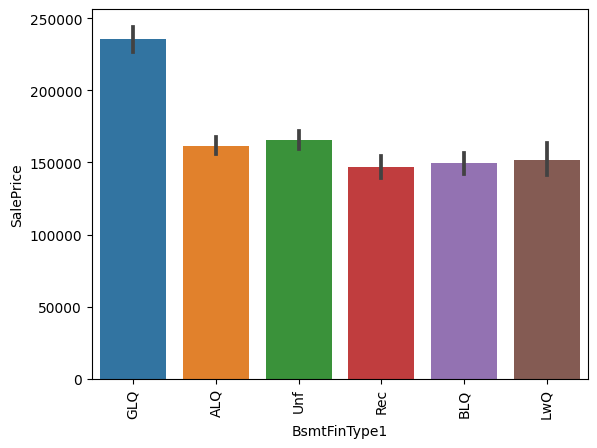

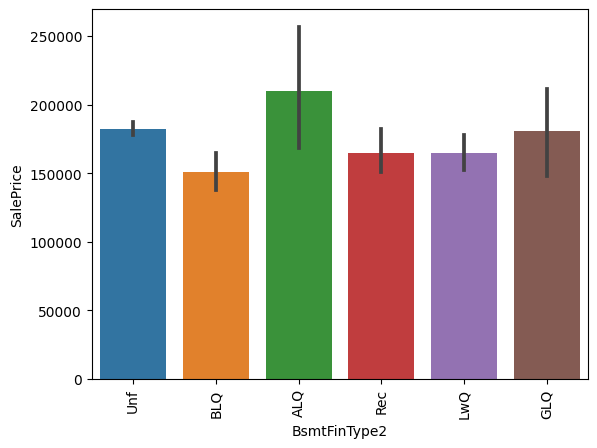

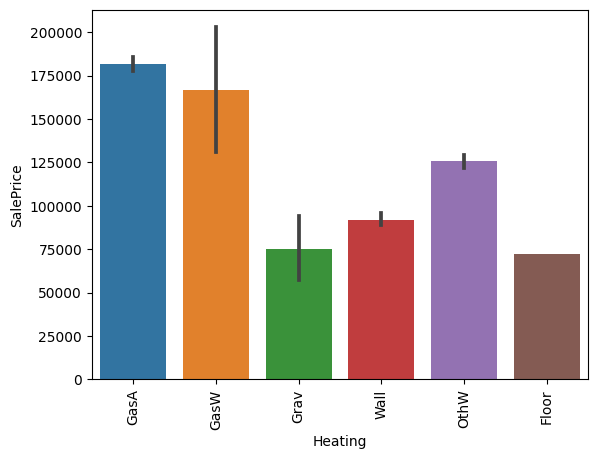

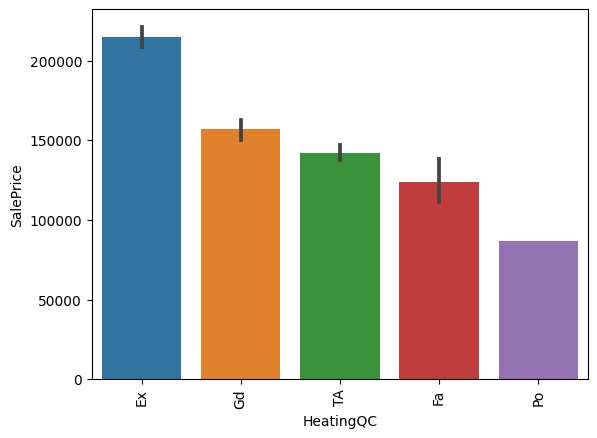

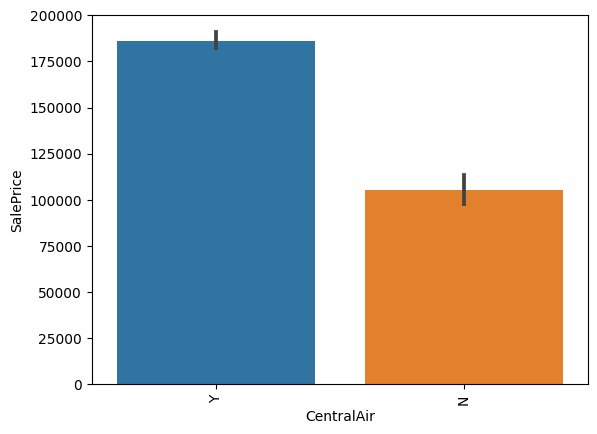

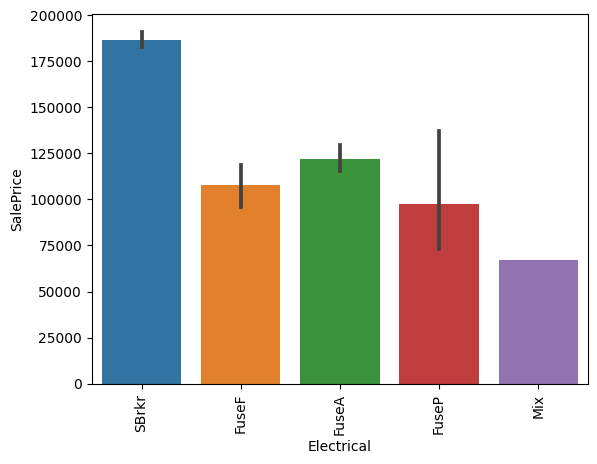

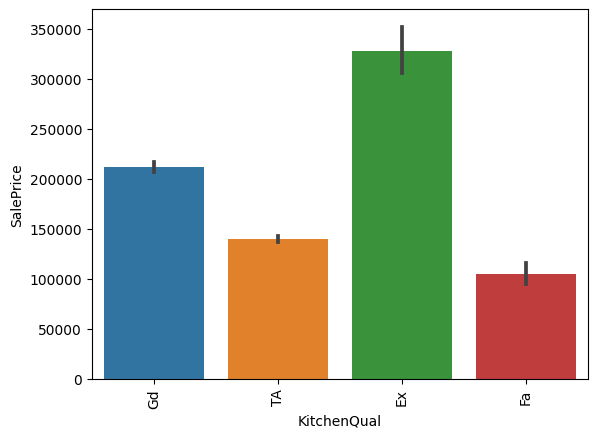

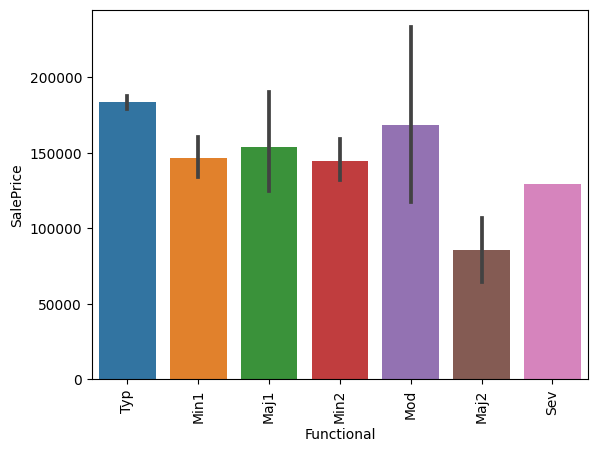

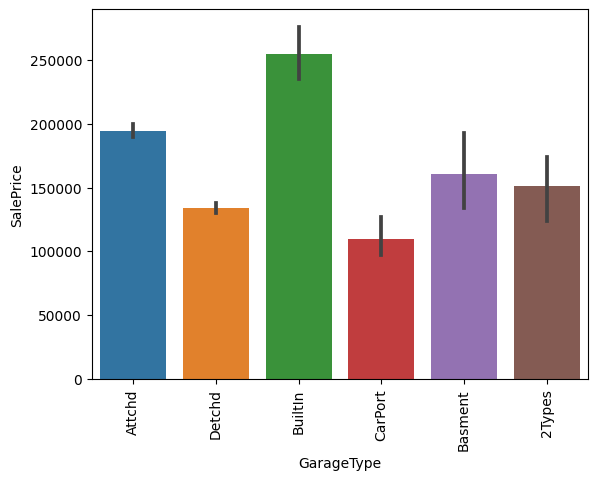

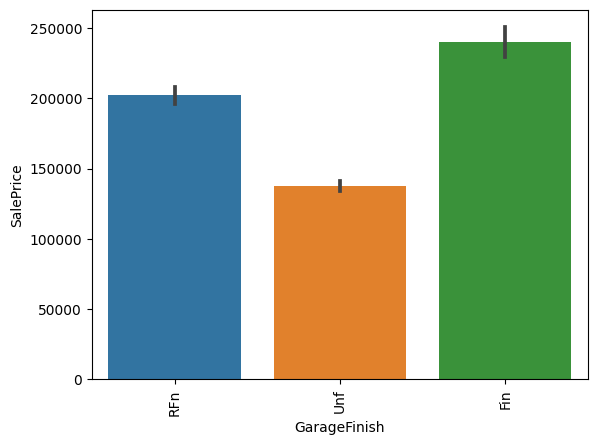

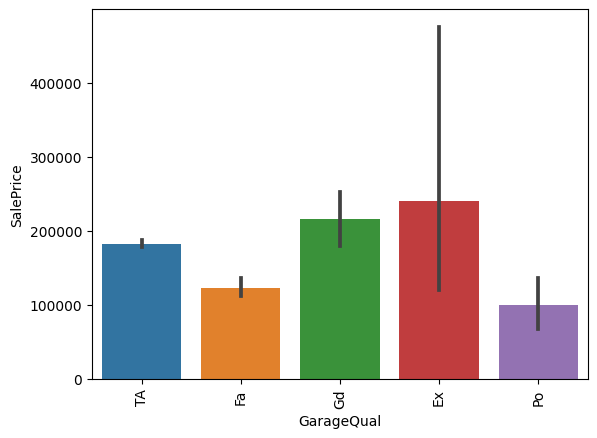

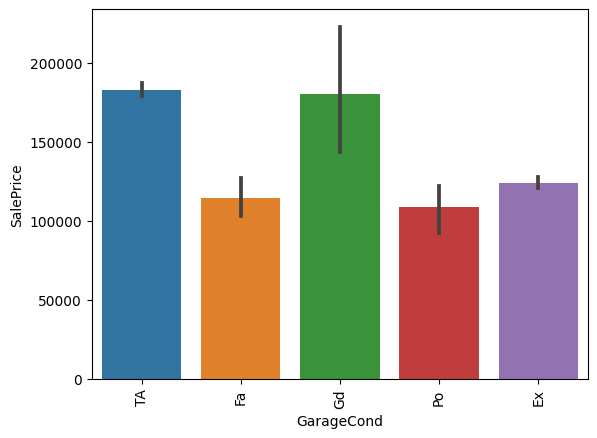

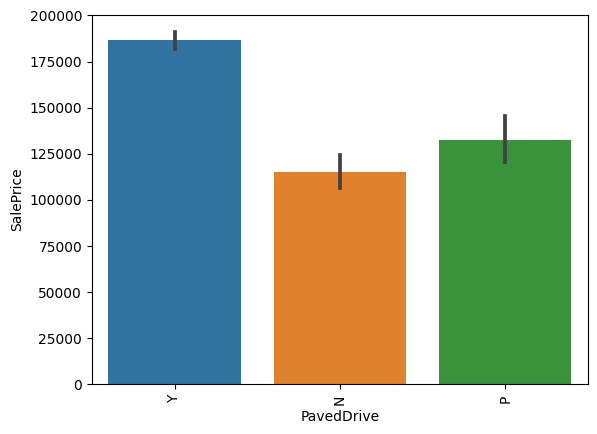

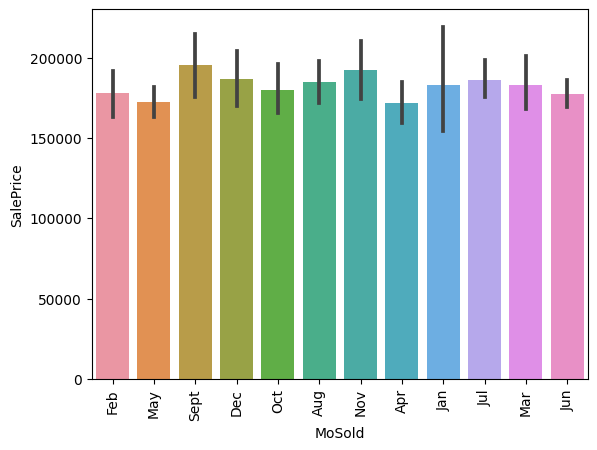

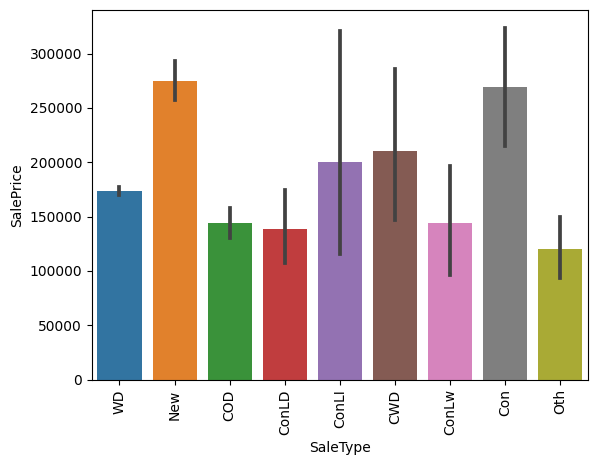

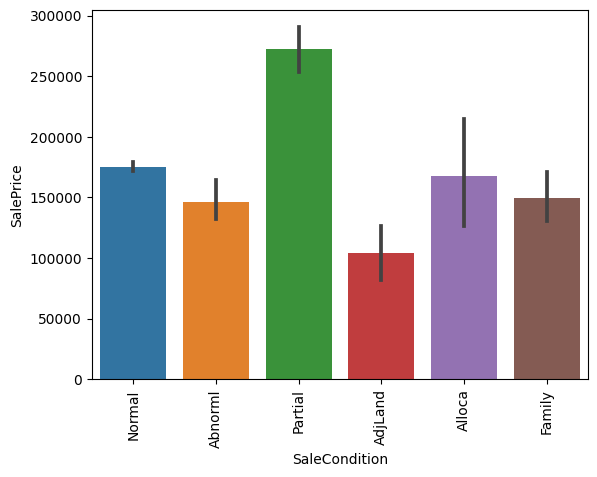

In [29]:
for column in df_cat.columns:
  sns.barplot(data=df,x=column,y='SalePrice')
  plt.xticks(rotation=90)
  plt.show()

#### Bi-variate Analysis for Numeric columns

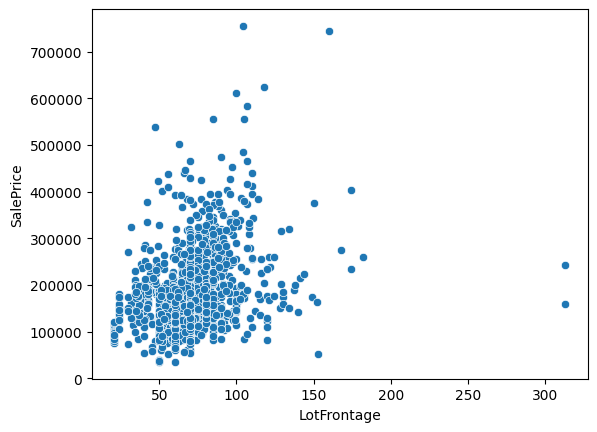

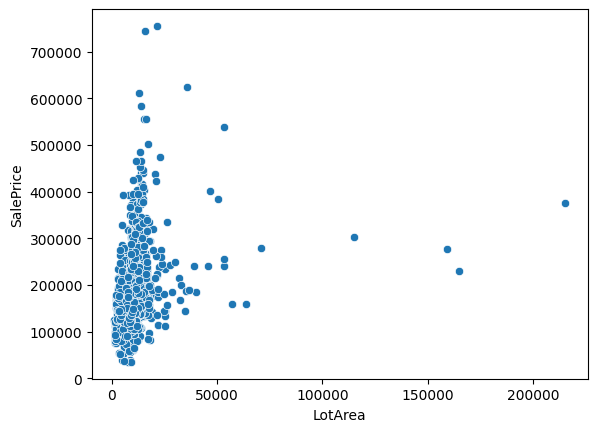

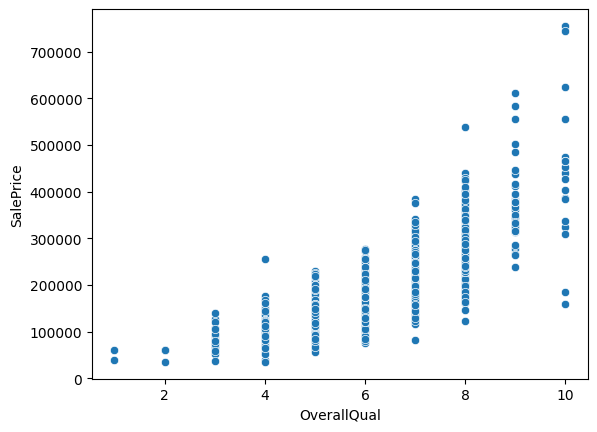

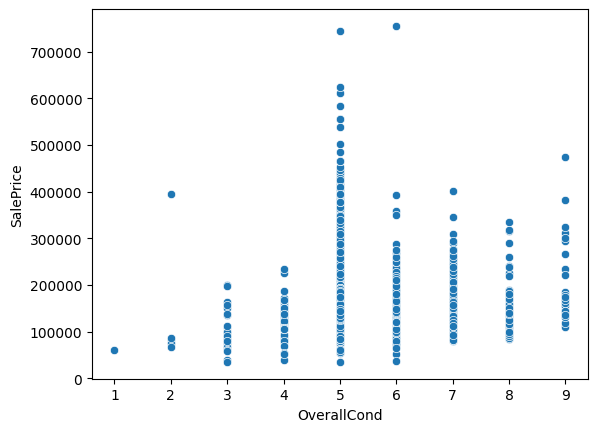

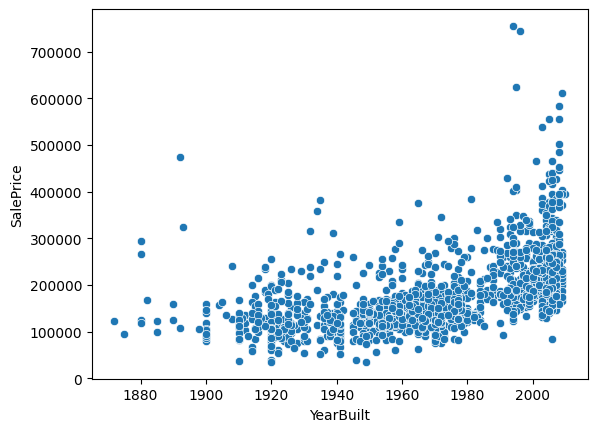

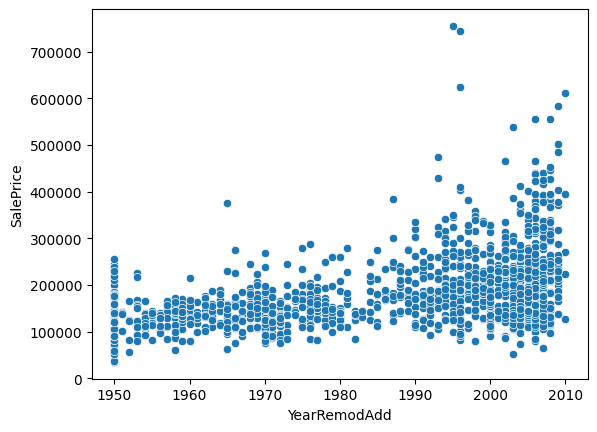

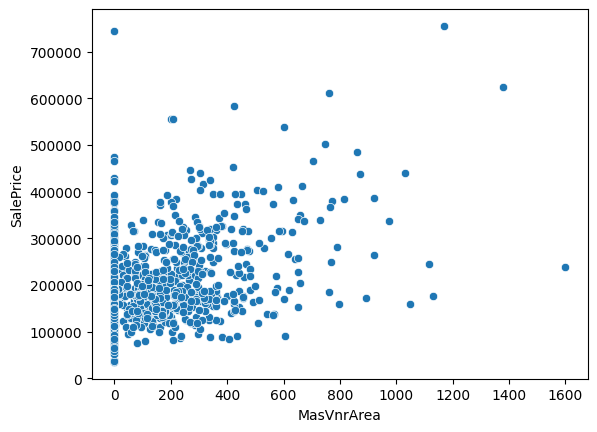

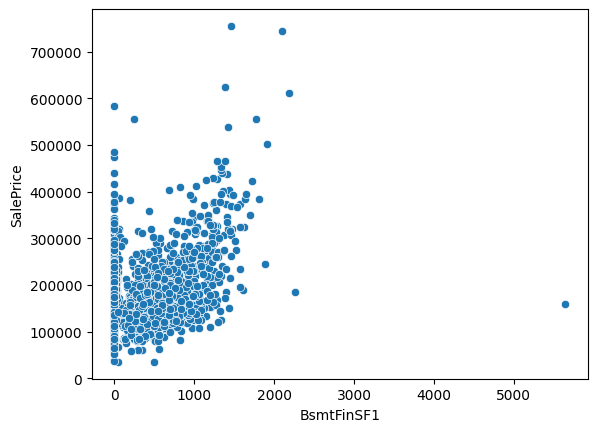

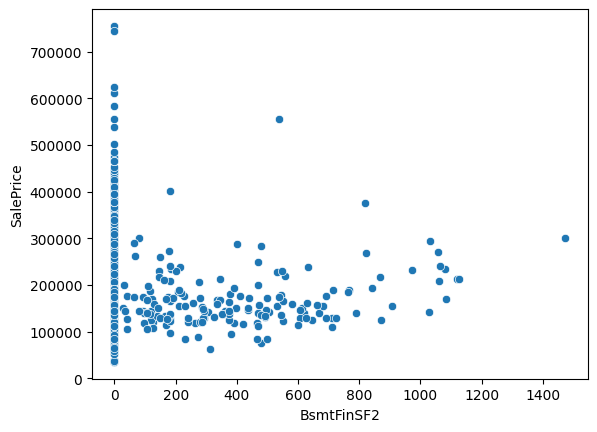

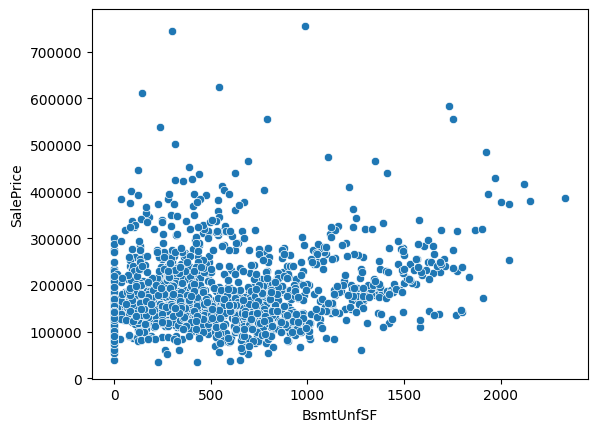

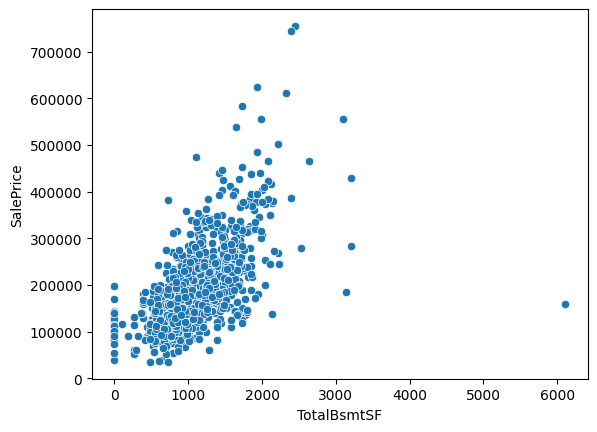

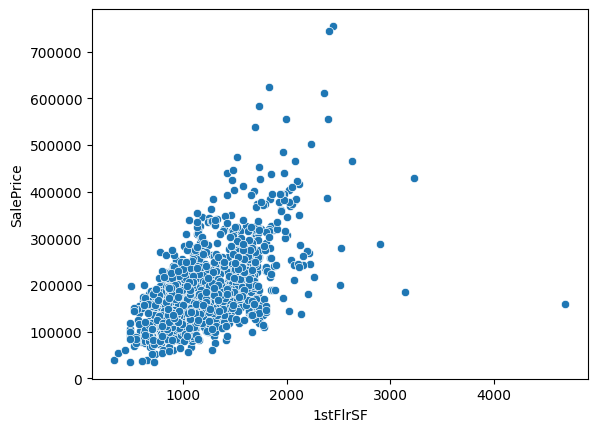

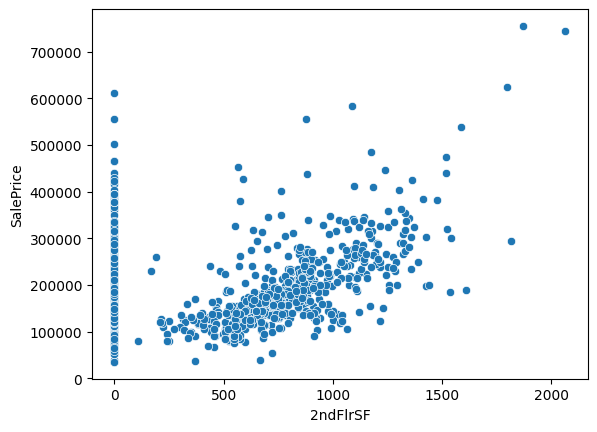

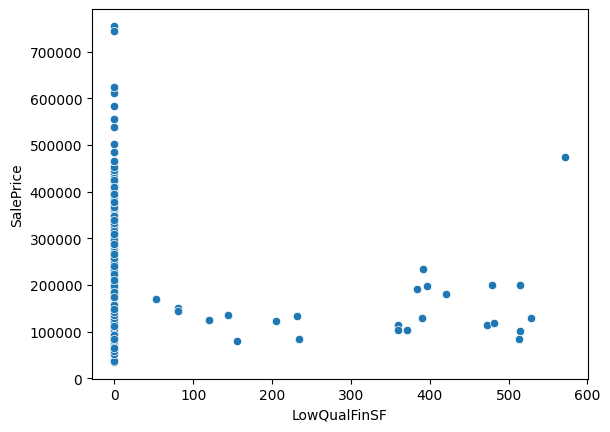

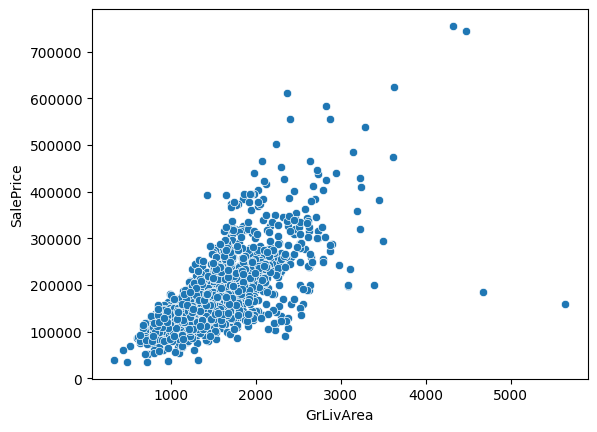

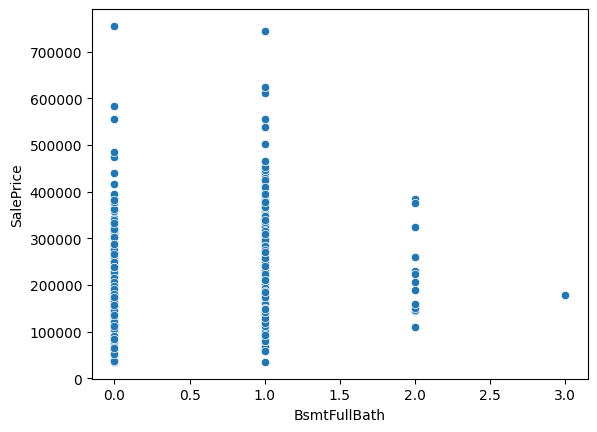

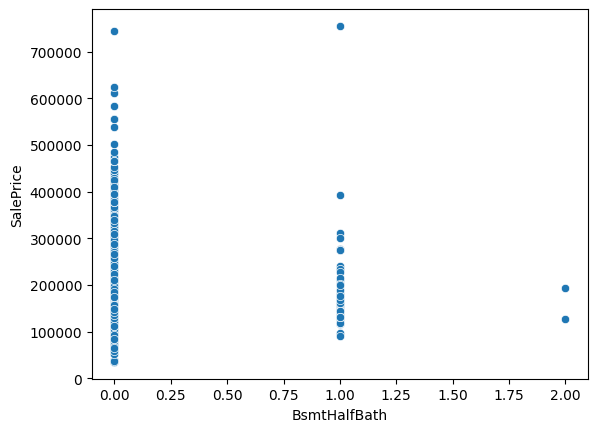

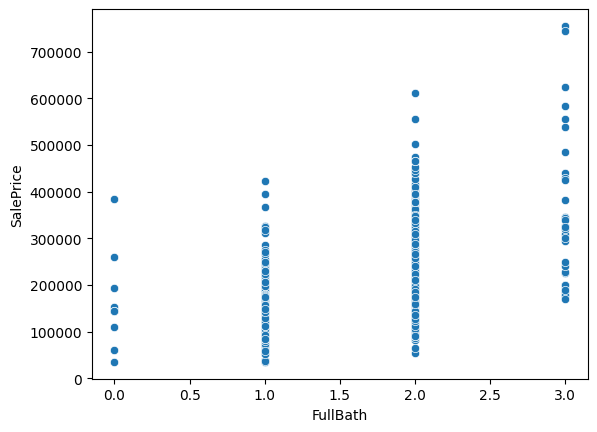

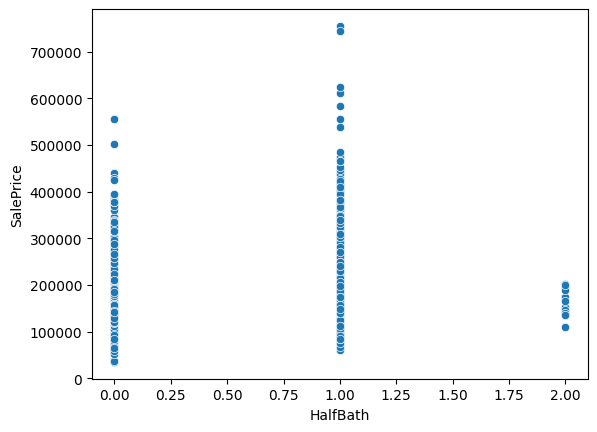

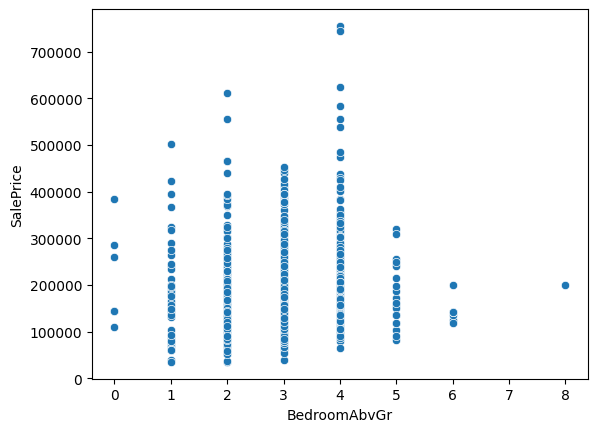

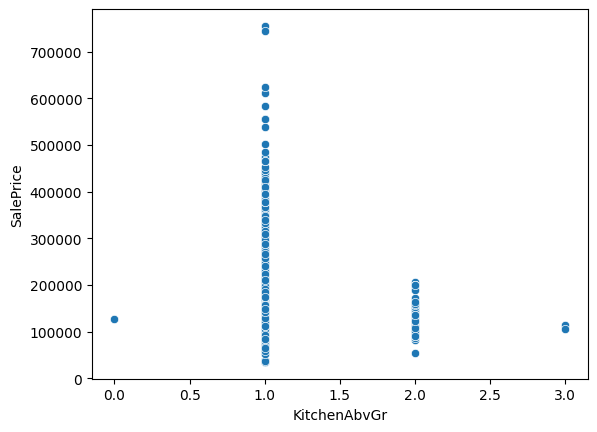

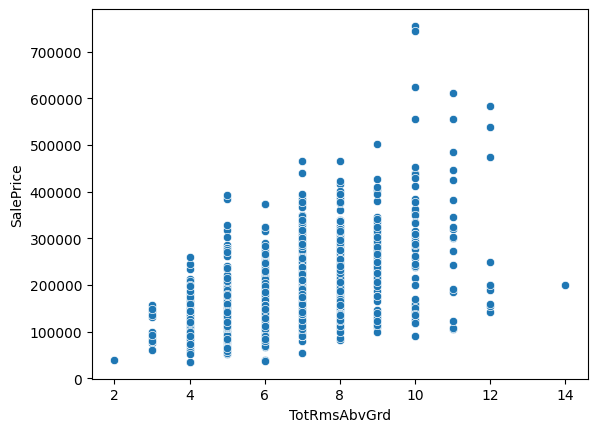

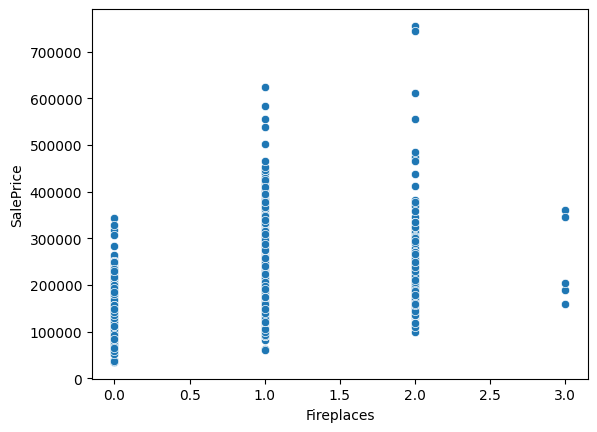

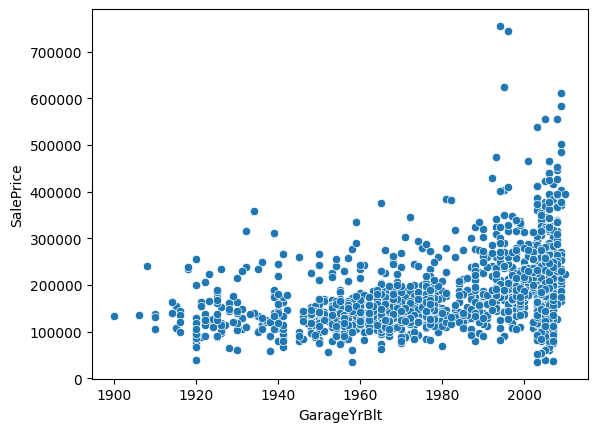

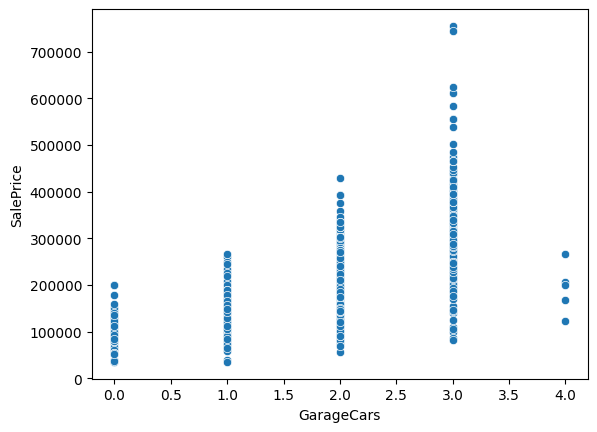

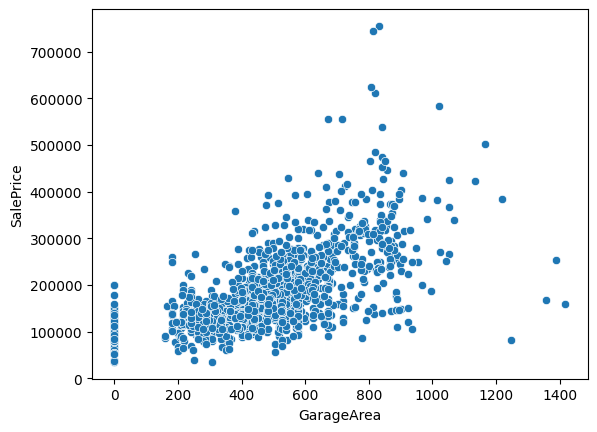

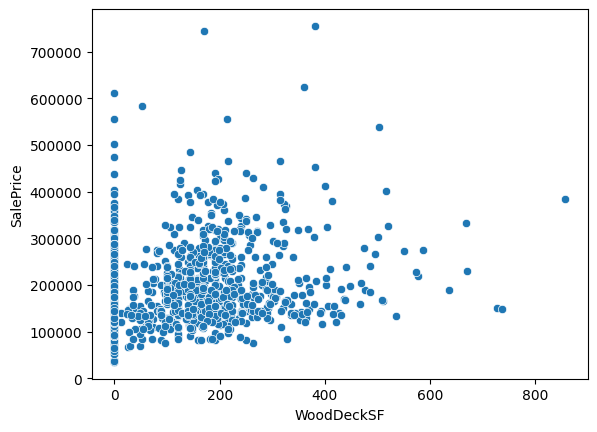

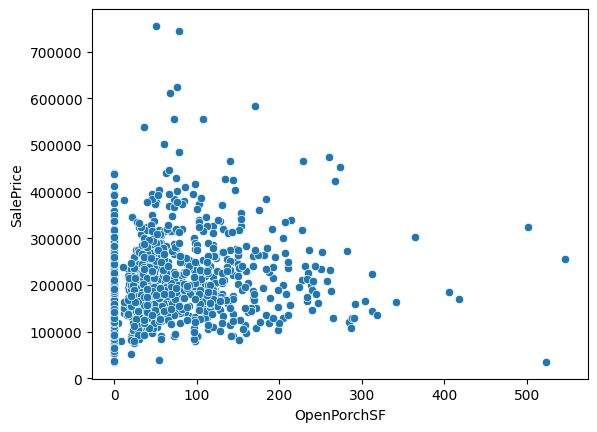

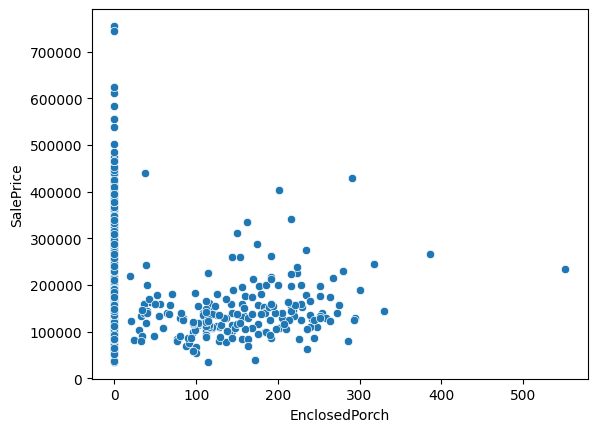

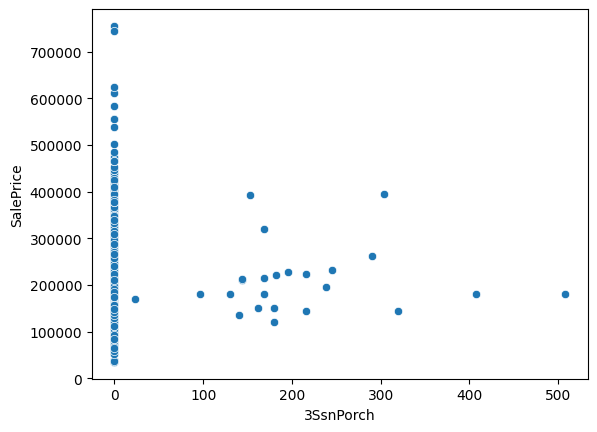

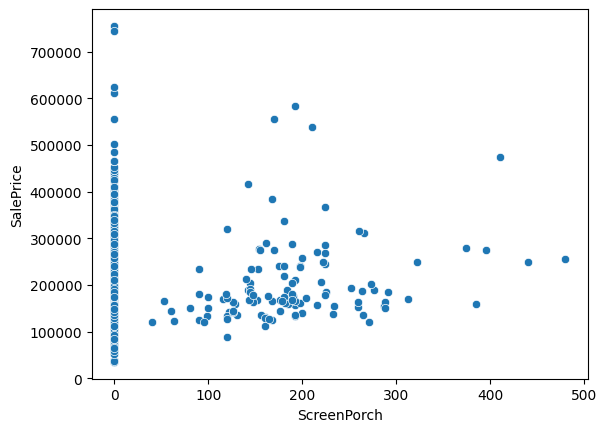

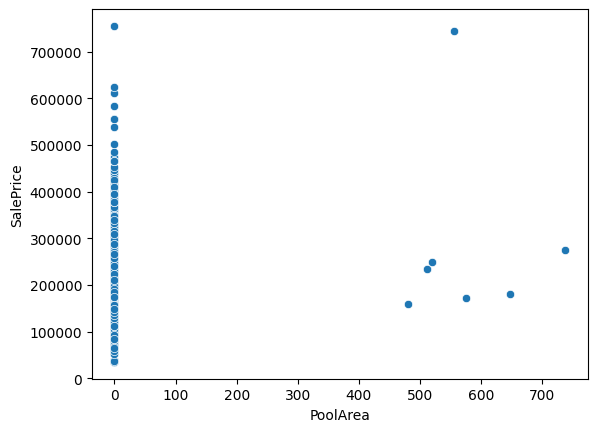

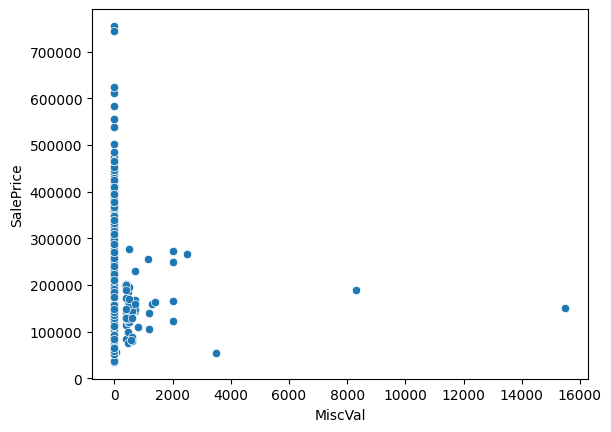

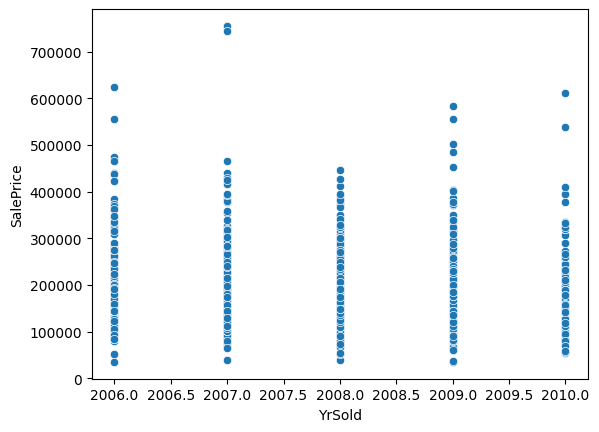

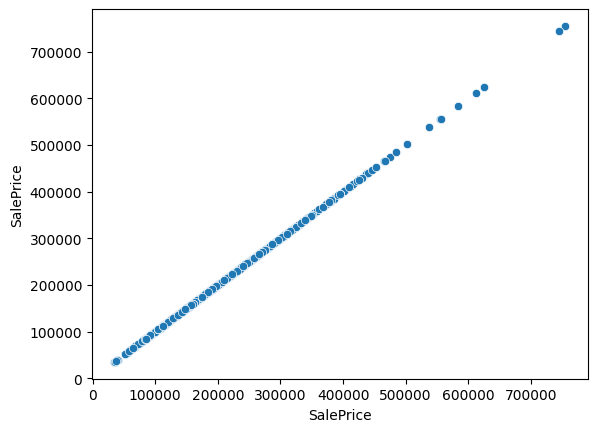

In [30]:
for column in df_num.columns:
  sns.scatterplot(data=df,x=column,y='SalePrice')
  plt.show()

#### Multivariate Analysis using Heat-map

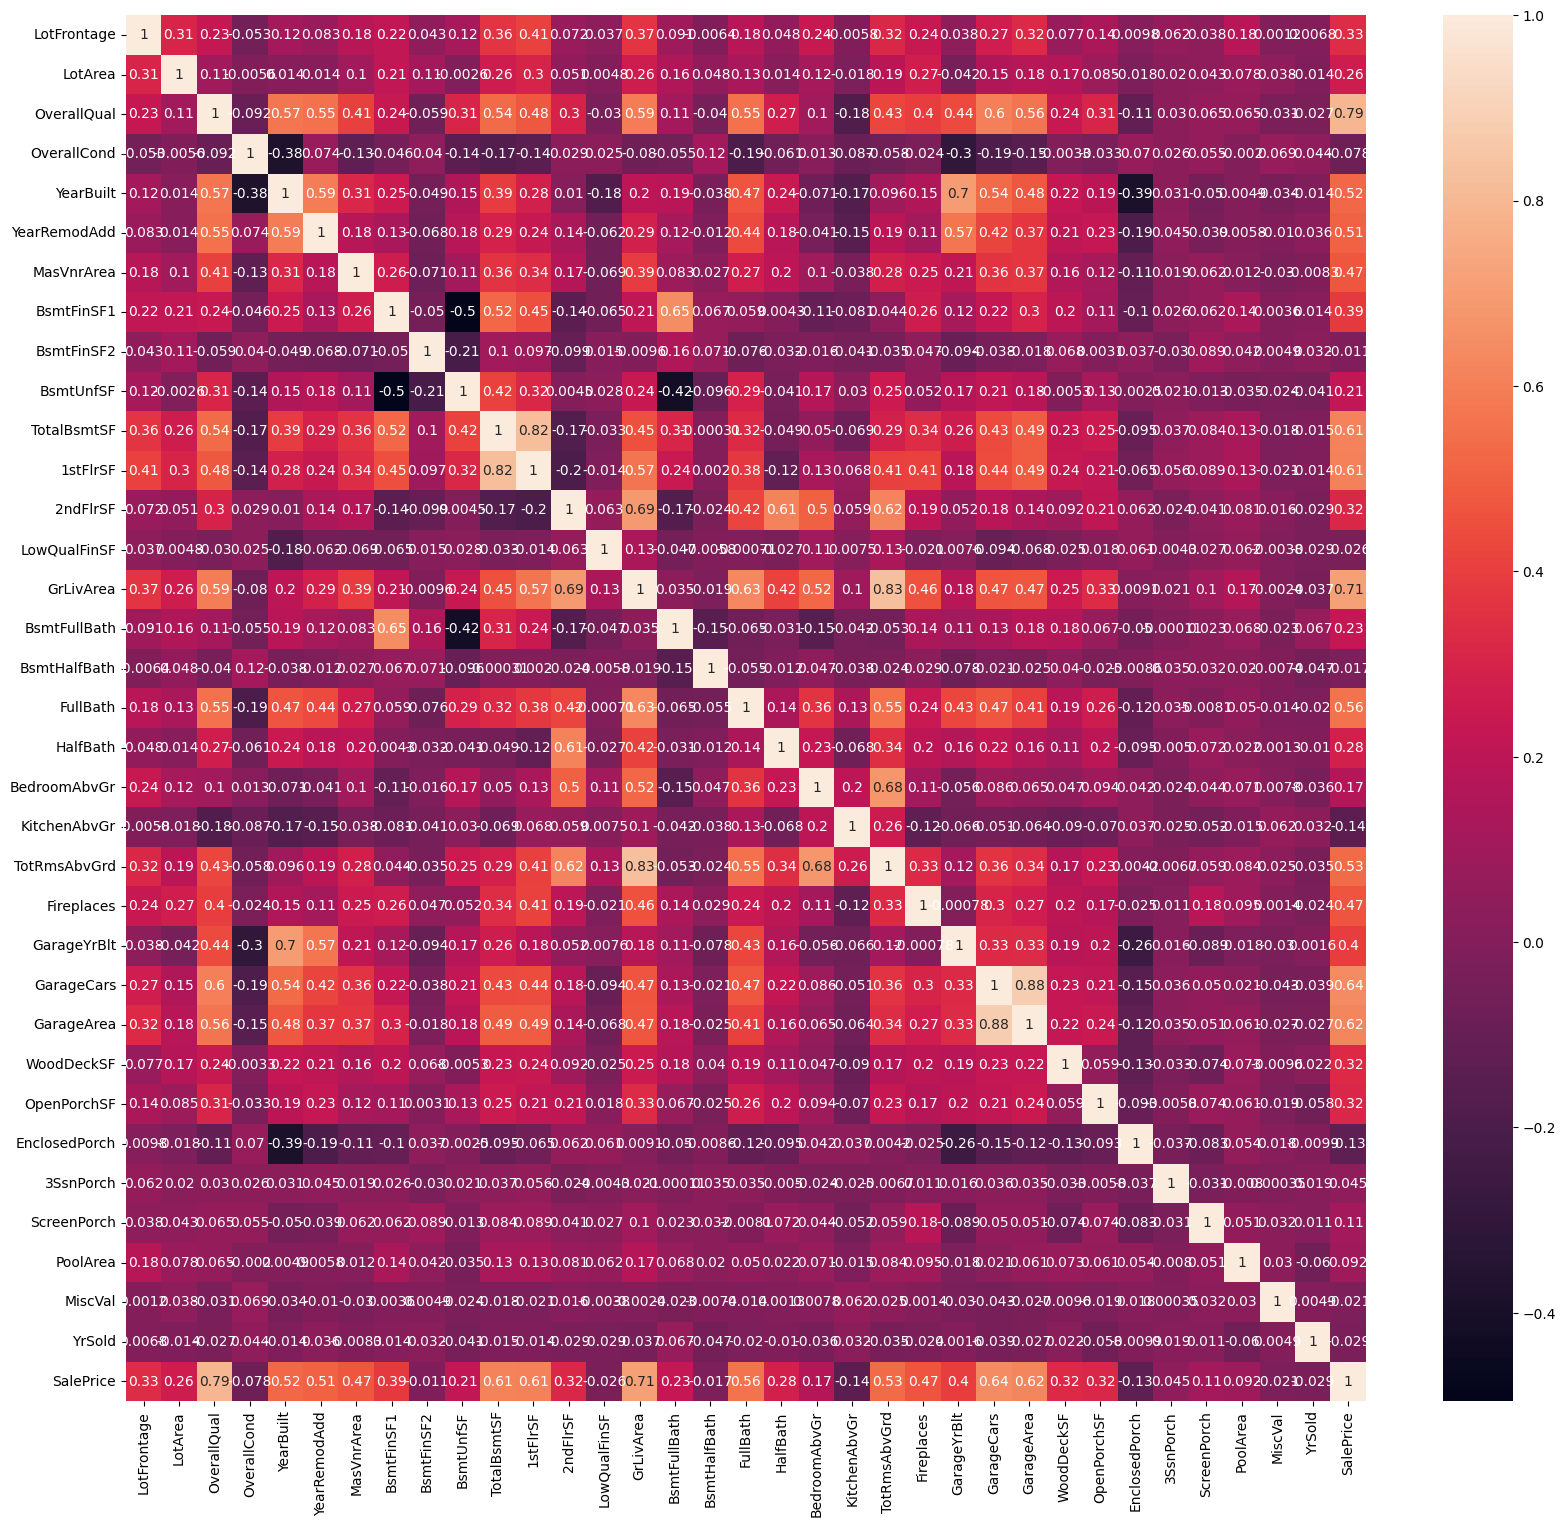

In [31]:
plt.figure(figsize=(20,18))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

#### Observations from uni-variate and bi-variate plots

1)  Type of dwelling plays crucial role in house price, 2-Story 1946& Newer has average Sale Price of 23k which is followed by duplex -all styles and ages & 2-1/2 story all ages dwelling.These are the top 3 types of dwelling for which average SalePrice is 200K and beyond it.<br>

2) Zoning- Floating village residential has average Sale Price of 200k which is followed by Residential Low Density (190k). Residential high and medium has the same avg. Sale price of 	130k while commercial house has the lowest SalePrice.<br>

3) Street- paved street has the high avg sale price compared to gravel.<br>

4) LotShape- very interesting insight observed here is that compared to regular lot shpe irregular lot shape has high Sale Price.<br>

5) LandContour- Hill side house has the higher Sale Price followed by low, level and banked.<br>

6) Utilities- House with all available utilities has avg. sale price of 175k while house with electricity ans gas utility has only 130k sale price.<br>

7) Lotconfig & Land slope - all categories of lot configuration and land slope has same impact on house sale price.<br>

8) Neighbourhood playing crucial role in House sale price, house with Northridge, Northridge Heights and stone brook has beyond 300k sale price. While Iowa DOT and Rail Road, Meadow Village and Briardale has the lowest sale price around 100k.<br>

9) Condition 2 shows high variability compared to condition 1. for Near positive off-site feature--park, greenbelt, etc. & Adjacent to postive off-site feature avg. Sale price is 280k and 325k respectively. For condition-1 avg. house price ranges from 140k to 210k.<br>

10) Bldg type-- Single-family Detached & Townhouse End Unit type of dwelling has 180k while Two-family Conversion; originally built as one-family dwelling, duplex and Townhouse Inside Unit has around 125k house price.<br>

11) House style--  Style of dwelling has steady rise in house sale price from One and one-half story: 2nd level unfinished to Two and one-half story: 2nd level finished. Same pattern has been shown in roofstyle as well. Roof style of shed and Hip has house sale price beyond 200k.<br> 

12) Roof material--  Wood Shingles roof material has avg. sale price of 400k while remaining roof material has around 200k which is almost half.<br>

13) Exterior1st: brick common exterior has very low sale price around 70k while Imitation Stucco and stone has very high house sale price of 250k. other are ranging from 100k to 200k.<br>

14)Exterior 2nd-- Masonry veneer type of stone has house price of around 250k followed by brick face (200k) ,brick common and none (150k).<br>

15) Exterior quality with excellent category has dramatic sale price of beyond 350k. While good quality (225k) , average quality around 150k and fair around 80k.<br>

16) Exterior cond--For Exterior condition average sale price is same for excellent, good and fair. but excellent condition has high range of house price ranging from 125k to 325k.<br>

17) Foundation with Poured Contrete, wood and stone has high sale price compared to slab and cinder block.<br>

18) Basement Quality is very crucial , house with excellent basement quality has as high as 325k sale price.<br>

19) Good basement condition and Good basement exposure has high sale price which is but obvious.<br>

20) Heating- House with this Gas forced warm air furnace & Gas hot water or steam heat has sale price of 175k , followed by Hot water or steam heat other than gas (125k).House with excellent heating quality & condition has avg. sale price beyond 200k which is steadily followed by good, average , fair.<br>

21) House with central Air has high sale price of 180k while without central Air it has 100k. House which has circuit breaker as electrical protection system having 180k sale price, while all other electrical equipments have around 100k house sale price.<br>

22) Excellent kitchen quality has very high house price of 320k, followed by good quality kitchen (200k) and average quality (140k).<br>

23) Garage type and garage finish have visible impact on house sale price- house with builtin, attached, basement & 2 types garage has high sale price. Finished garage has high price compared to unfinished.<br>
Excellent , good and average Garage quality & condition has approximately same house sale price. Fair and poor garage quality condition has below 100k sale price.<br>

24) Paved driveway - House with paved driveway has as high as 180k price while partial paved and no paved has around 125k price.<br>

25) Sale Type-- Home just constructed and sold & Contract 15% Down payment regular terms house has sale price of 275k which is highest in sale type category.<br>

26 ) Sale condition-- Home was not completed when last assessed (associated with New Homes) has 275k sale price while all other condition ranging from 100k to 170k.<br>

27)  From pair-plot we found that, as overall quality of house increases Sale-price increases linearly.<br>

28)  With, Overall condition SalePrice is also increasing but very strange observation found that is for Average condition very high sale price is observed.<br>

29) As Year built of house increases , avg. sale price of house also increases.<br>

30) Type-1 finished sq. feet of house increases, house sale price also increases, but for 0 finished sq. feet there is wide range of house price exists.<br>

31) Type-2 finished square feet is very crucial , there are high chances that if house sale price is beyond 300k then it would have 0 sq. feet.<br>

32) Total sq. feet area, First floor sq. feet area , Second floor sq. feet area and ground living area is completely correlated with house sale price. And inversely correlated with low qualiy sq. feet area.<br>

33) As number of full bathroom and half bathroom increases then avg. house sale price increases.<br> 

34) Average sale price of house with 4 bedroom is very high followed by 3 bedroom & 2 bedroom. While as total room above ground increases then avg. Sale price of house increases.<br>

35) Houses,  beyond 400k price then they possessed 1 or 2 fire <br>

36) Size of garage car capacity & Garage area linearly correlated with house sale price.<br>

37) If house has wood deck then as wood deck area increases then house price increases, but house does not have wood deck then there is also high house price.<br>

38)  Very high house price beyond 400k price, then it has open porch area for sure.<br>

##### Here, for multicollinearity we can use heatmap or correlation matrix, just because it is too high to visualize we will create one function from which we will get column names for which correlation is beyond threshold

In [32]:
corr_mat=df.corr()
corr_mat

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.306795     0.234196    -0.052820   0.117598   
LotArea           0.306795  1.000000     0.105806    -0.005636   0.014228   
OverallQual       0.234196  0.105806     1.000000    -0.091932   0.572323   
OverallCond      -0.052820 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt         0.117598  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd      0.082746  0.013788     0.550684     0.073741   0.592855   
MasVnrArea        0.178699  0.103321     0.407252    -0.125694   0.311600   
BsmtFinSF1        0.215828  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2        0.043340  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF         0.122156 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF       0.363358  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF          0.414266  0.299475     0.476224    -0.144203   0.281986   
2ndFlrSF          0.072483  0.050986     0.295493     0.028942   0.010308   
LowQualFinSF      0.036849  0.004779    -0.030429     0.025494  -0.183784   
GrLivArea         0.368392  0.263116     0.593007    -0.079686   0.199010   
BsmtFullBath      0.091481  0.158155     0.111098    -0.054942   0.187599   
BsmtHalfBath     -0.006419  0.048046    -0.040150     0.117821  -0.038162   
FullBath          0.180424  0.126031     0.550600    -0.194149   0.468271   
HalfBath          0.048258  0.014259     0.273458    -0.060769   0.242656   
BedroomAbvGr      0.237023  0.119690     0.101676     0.012980  -0.070651   
KitchenAbvGr     -0.005805 -0.017784    -0.183882    -0.087001  -0.174800   
TotRmsAbvGrd      0.320146  0.190015     0.427452    -0.057583   0.095589   
Fireplaces        0.235755  0.271364     0.396765    -0.023820   0.147716   
GarageYrBlt       0.038364 -0.042167     0.437370    -0.300101   0.699527   
GarageCars        0.269729  0.154871     0.600671    -0.185758   0.537850   
GarageArea        0.323663  0.180403     0.562022    -0.151521   0.478954   
WoodDeckSF        0.077106  0.171698     0.238923    -0.003334   0.224880   
OpenPorchSF       0.137454  0.084774     0.308819    -0.032589   0.188686   
EnclosedPorch     0.009790 -0.018340    -0.113937     0.070356  -0.387268   
3SsnPorch         0.062335  0.020423     0.030371     0.025504   0.031355   
ScreenPorch       0.037684  0.043160     0.064886     0.054811  -0.050364   
PoolArea          0.180868  0.077672     0.065166    -0.001985   0.004950   
MiscVal           0.001168  0.038068    -0.031406     0.068777  -0.034383   
YrSold            0.006768 -0.014261    -0.027347     0.043950  -0.013618   
SalePrice         0.334901  0.263843     0.790982    -0.077856   0.522897   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage        0.082746    0.178699    0.215828    0.043340   0.122156   
LotArea            0.013788    0.103321    0.214103    0.111170  -0.002618   
OverallQual        0.550684    0.407252    0.239666   -0.059119   0.308159   
OverallCond        0.073741   -0.125694   -0.046231    0.040229  -0.136841   
YearBuilt          0.592855    0.311600    0.249503   -0.049107   0.149040   
YearRemodAdd       1.000000    0.176529    0.128451   -0.067759   0.181133   
MasVnrArea         0.176529    1.000000    0.261256   -0.071330   0.113862   
BsmtFinSF1         0.128451    0.261256    1.000000   -0.050117  -0.495251   
BsmtFinSF2        -0.067759   -0.071330   -0.050117    1.000000  -0.209294   
BsmtUnfSF          0.181133    0.113862   -0.495251   -0.209294   1.000000   
TotalBsmtSF        0.291066    0.360067    0.522396    0.104810   0.415360   
1stFlrSF           0.240379    0.339850    0.445863    0.097117   0.317987   
2ndFlrSF           0.140024    0.173800   -0.137079   -0.099260   0.004469   
LowQualFinSF      -0.062419   -0.068628   -0.064503    0.014807   0.028167   
GrLivArea          0.287389    0.388052    0.208171   -0.009640   0.2402

In [33]:
multi_corr=[]
for i in range(len(corr_mat.columns)):
  for j in range(i):
    if abs(corr_mat.iloc[i,j])>=0.80 and abs(corr_mat.iloc[i,j])<1.0:
      multi_corr.append((corr_mat.columns[i],corr_mat.columns[j]))

In [34]:
multi_corr

[('1stFlrSF', 'TotalBsmtSF'),
 ('TotRmsAbvGrd', 'GrLivArea'),
 ('GarageArea', 'GarageCars')]

Here, we found highly correlated predictor variables which we have to drop either one of them, which we will do in model building part.

## 3. Data Preparation

In [35]:
## Checking Outliers for numeric features

df_num=df.select_dtypes(exclude='object')

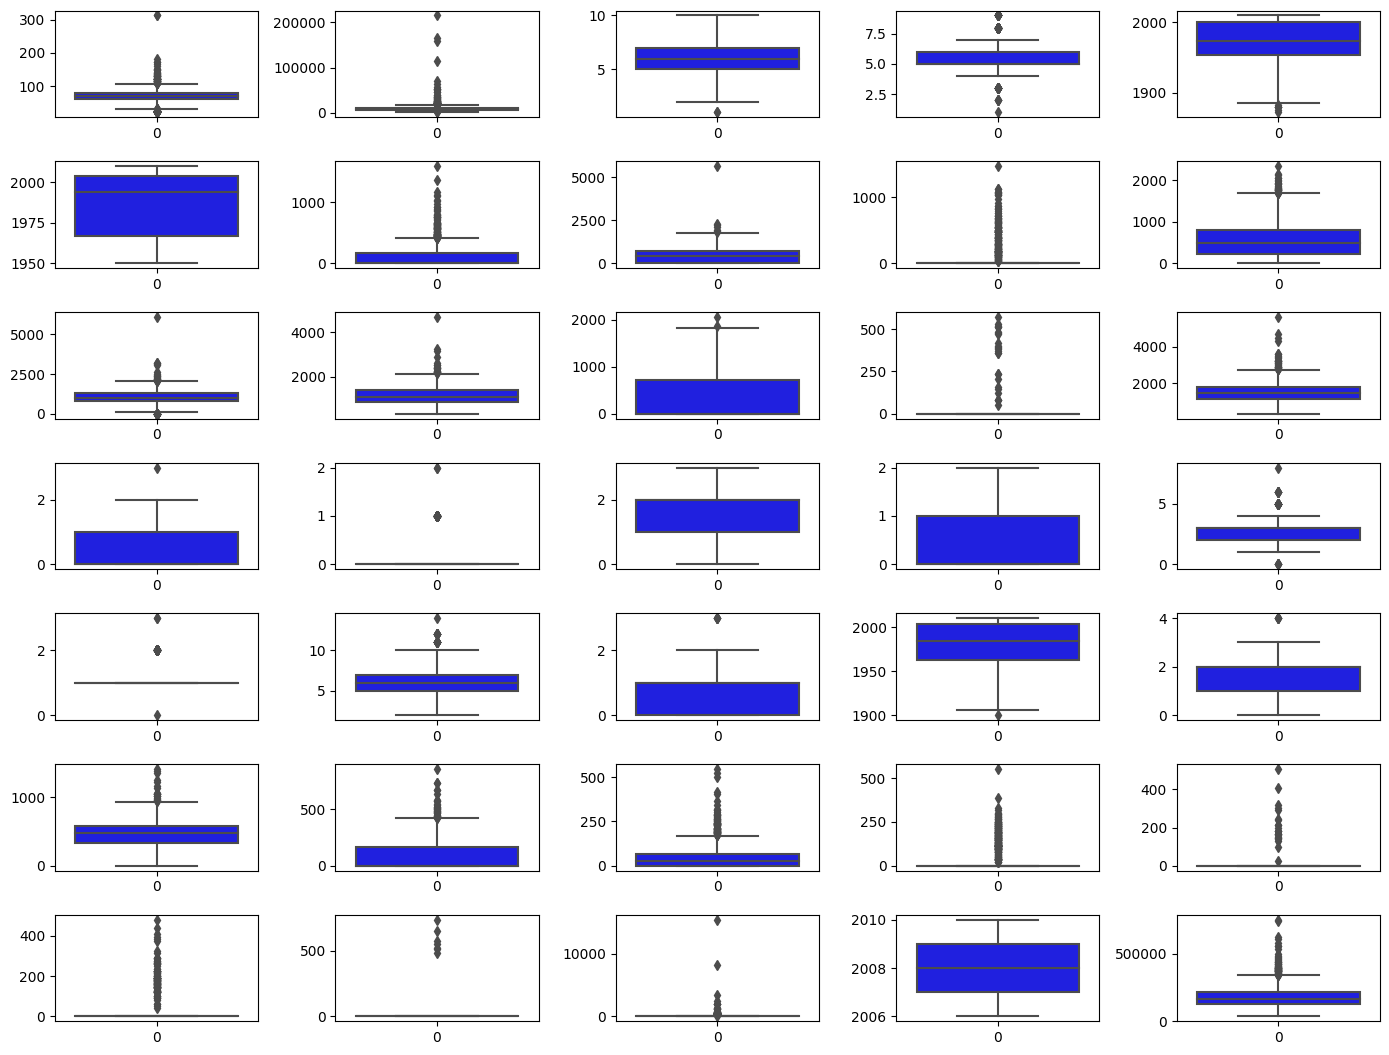

In [36]:
plt.figure(figsize=(14,30))
for i in range(0,len(df_num.columns)):
  plt.subplot(20,5,i+1)
  ax=sns.boxplot(df[df_num.columns[i]],color='blue')
  plt.tight_layout()

From box-plots we can see that many numeric features have outliers, we will remove it using quantile method


In [37]:
## Handling extreme outliers using percentile method
for col in df_num.columns:
    percentile=df[col].quantile([0.01,0.98]).values
    df[col][df[col]<=percentile[0]]=percentile[0]
    df[col][df[col]>=percentile[1]]=percentile[1]

## Here, for every numeric column any value below min value or any value above 98th percentile vale will be replaced by min & 98th per. values respectively

In [38]:
## Dataframe which will contain all categorical features

df_cat=df.select_dtypes(include='object')

In [39]:
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [40]:
for column in df_cat.columns:
  print(column,df[column].unique())

MSSubClass ['F' 'A' 'G' 'E' 'O' 'D' 'K' 'L' 'B' 'J' 'I' 'N' 'H' 'C']
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 

In [41]:
## we will apply one-hot encoding to the categorical columns, because majority of columns don't have order in its categories
df_cat_dummies = pd.get_dummies(df_cat, drop_first=True)
df_cat_dummies.head()

MSSubClass_B  MSSubClass_C  MSSubClass_D  MSSubClass_E  MSSubClass_F  \
0             0             0             0             0             1   
1             0             0             0             0             0   
2             0             0             0             0             1   
3             0             0             0             0             0   
4             0             0             0             0             1   

   MSSubClass_G  MSSubClass_H  MSSubClass_I  MSSubClass_J  MSSubClass_K  ...  \
0             0             0             0             0             0  ...   
1             0             0             0             0             0  ...   
2             0             0             0             0             0  ...   
3             1             0             0             0             0  ...   
4             0             0             0             0             0  ...   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 220 columns]

In [42]:
## drop all categorical columns from the original dataframe
df=df.drop(list(df_cat.columns),axis=1)

In [43]:
## Now we will concat df_cat_dummies to original dataframe
df=pd.concat([df,df_cat_dummies],axis=1)
df.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0   8450.0            7            5     2003.0          2003   
1         80.0   9600.0            6            8     1976.0          1976   
2         68.0  11250.0            7            5     2001.0          2002   
3         60.0   9550.0            7            5     1915.0          1970   
4         84.0  14260.0            8            5     2000.0          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
0       196.0       706.0         0.0      150.0  ...               0   
1         0.0       978.0         0.0      284.0  ...               0   
2       162.0       486.0         0.0      434.0  ...               0   
3         0.0       216.0         0.0      540.0  ...               0   
4       350.0       655.0         0.0      490.0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 255 columns]

## 4. Model Building & Evaluation

#### A) Using Multiple Linear Regression

In [44]:
## Using train_test split we split our dataset 
df_train,df_test=train_test_split(df,test_size=0.3,random_state=42)

In [45]:
df_train.shape, df_test.shape

((1022, 255), (438, 255))

In [46]:
## Scaling:

## we will apply min_max_scaling to all numeric features
scaler = MinMaxScaler()

In [47]:
columns=df_num.columns.to_list()
columns

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [48]:
df_train[columns]=scaler.fit_transform(df_train[columns])

In [49]:
df_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
135      0.591064  0.369936     0.666667          0.6   0.650799   
1452     0.140252  0.084636     0.333333          0.4   0.972432   
762      0.510920  0.295270     0.666667          0.4   1.000000   
932      0.631136  0.423815     1.000000          0.4   0.981621   
435      0.220397  0.381264     0.666667          0.6   0.889726   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
135       0.344828    0.442519    0.000000    0.000000   0.777023  ...   
1452      0.948276    0.122922    0.379166    0.000000   0.000000  ...   
762       1.000000    0.000000    0.016636    0.000000   0.436182  ...   
932       0.965517    0.464030    0.000000    0.000000   1.000000  ...   
435       0.793103    0.000000    0.266872    0.522701   0.041711  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
135                0               0             0             0            1   
1452               0               0             0             0            1   
762                0               0             0             0            0   
932                0               0             0             0            1   
435                0               1             0             0            0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
135                       0                     0                     0   
1452                      0                     0                     0   
762                       0                     0                     0   
932                       0                     0                     0   
435                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
135                      1                      0  
1452                     1                      0  
762                      1                      0  
932                      1                      0  
435                      1                      0  

[5 rows x 255 columns]

In [50]:
y_train=df_train.pop('SalePrice')
X_train=df_train

In [51]:
## Fit X_train & y_train to linear regression model

lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [52]:
## scaling of testing dataframe 
df_test[columns]=scaler.transform(df_test[columns])

In [53]:
y_test=df_test.pop('SalePrice')
X_test=df_test

In [54]:
## Prediction SalePrice from model
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [55]:
## R_squared and RMSE calculation

metric_1=[]

R2_train=r2_score(y_train,y_pred_train)
print('R-squared for training set',R2_train)
metric_1.append(R2_train)

R2_test=r2_score(y_test,y_pred_test)
print('R-squared for testing set',R2_test)
metric_1.append(R2_test)

RMSE_train=mean_squared_error(y_train,y_pred_train)
print('RMSE for training set',RMSE_train**0.5)
metric_1.append(RMSE_train**0.5)


RMSE_test=mean_squared_error(y_test,y_pred_test)
print('RMSE for testing set',RMSE_test**0.5)
metric_1.append(RMSE_test**0.5)

R-squared for training set 0.9453384143678797
R-squared for testing set -1.3472560938536122e+21
RMSE for training set 0.04986668616270628
RMSE for testing set 8061968558.104677


Here, we can see that our model is highly overfitted, so we require generalised model. Next, we will try regularized models

#### B) Using Ridge Regression

In [56]:
## We know lambda is also known as alpha , if we use very high lambda then model will be more simple.If we keep it very small, then overfitting will not address
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
print(model_cv.best_params_)

{'alpha': 7.0}


In [58]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=7)

In [59]:
## Prediction SalePrice from model
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [60]:
## R_squared and RMSE calculation
metric_2=[]

R2_train=r2_score(y_train,y_pred_train)
print('R-squared for training set',R2_train)
metric_2.append(R2_train)

R2_test=r2_score(y_test,y_pred_test)
print('R-squared for testing set',R2_test)
metric_2.append(R2_test)

RMSE_train=mean_squared_error(y_train,y_pred_train)
print('RMSE for training set',RMSE_train**0.5)
metric_2.append(RMSE_train**0.5)

RMSE_test=mean_squared_error(y_test,y_pred_test)
print('RMSE for testing set',RMSE_test**0.5)
metric_2.append(RMSE_test**0.5)

R-squared for training set 0.9239195930280292
R-squared for testing set 0.9160890872676434
RMSE for training set 0.058830942944276814
RMSE for testing set 0.06362462626618205


Here, It is completely visible that Ridge regression has resolved overfitting problem with penalty term

In [61]:
## print coefficients of Ridge model and also top 5 features with their coefficients
coefficients = ridge.coef_

# Create a dictionary mapping feature names to their coefficients
feature_coefficients = {feature: coefficient for feature, coefficient in zip(X_train.columns, coefficients)}

# Sort the features based on the absolute magnitude of their coefficients
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Select the top 5 features with their coefficients
top_5_features = sorted_features[:5]

print("Top 5 features with model coefficients:")
for feature, coefficient in top_5_features:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Top 5 features with model coefficients:
Feature: GrLivArea, Coefficient: 0.12678846146454376
Feature: OverallQual, Coefficient: 0.11480240727016908
Feature: 1stFlrSF, Coefficient: 0.08815770138634418
Feature: Neighborhood_StoneBr, Coefficient: 0.07685635609719084
Feature: 2ndFlrSF, Coefficient: 0.06612130431087919


##### Residual Analysis for Ridge model

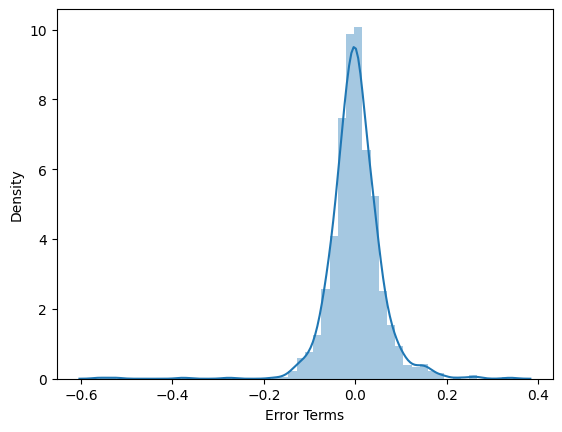

In [62]:
## check normality of error terms
y_res=y_train-y_pred_train

sns.distplot(y_res,kde=True)
plt.xlabel('Error Terms')
plt.show()

Here, Error terms are normally distributed with mean equal to 0

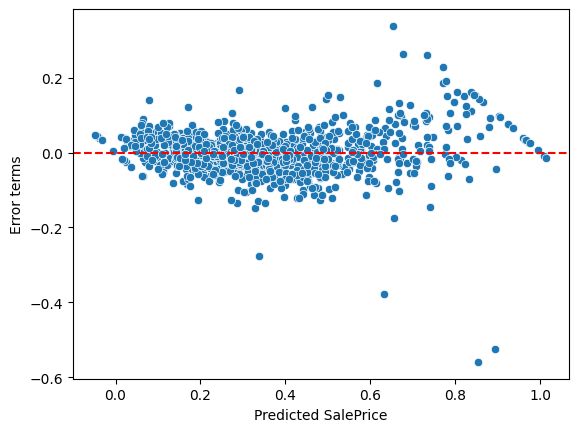

In [63]:
## we will plot scatter plot between y_pred_train and y_res , to check homoscedasticity of error terms

sns.scatterplot(x=y_pred_train,y=y_res)
plt.axhline(color='red',linestyle='--' )
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error terms')
plt.show()

From, above plot we can see that data is homoscedastic and for each predicted price avg. error term is zero.

Thus, we can say our all assumptions are satisfied, we can use Ridge model for the price prediction

#### C) Using Lasso Regression

In [64]:
## Here everything will be same as Ridge , just replace it with Lasso
## One thing we will check that number of features lasso will give because it provides feature selection

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [66]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [67]:
## Prediction SalePrice from model
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [68]:
## R_squared and RMSE calculation
metric_3=[]

R2_train=r2_score(y_train,y_pred_train)
print('R-squared for training set',R2_train)
metric_3.append(R2_train)

R2_test=r2_score(y_test,y_pred_test)
print('R-squared for testing set',R2_test)
metric_3.append(R2_test)

RMSE_train=mean_squared_error(y_train,y_pred_train)
print('RMSE for training set',RMSE_train**0.5)
metric_3.append(RMSE_train**0.5)

RMSE_test=mean_squared_error(y_test,y_pred_test)
print('RMSE for testing set',RMSE_test**0.5)
metric_3.append(RMSE_test**0.5)

R-squared for training set 0.9303303430722056
R-squared for testing set 0.915391756420892
RMSE for training set 0.05629777509840626
RMSE for testing set 0.06388845141526178


Here, R2_score and RMSE for training_set and testing_set is very near, so our model is well trained and well generalised.

In [69]:
## print coefficients of Lasso model and also top 5 features with their coefficients
coefficients = lasso.coef_

# Create a dictionary mapping feature names to their coefficients
feature_coefficients = {feature: coefficient for feature, coefficient in zip(X_train.columns, coefficients)}

# Sort the features based on the absolute magnitude of their coefficients
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Select the top 5 features with their coefficients
top_5_features = sorted_features[:5]

print("Top 5 features with model coefficients:")
for feature, coefficient in top_5_features:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Top 5 features with model coefficients:
Feature: GrLivArea, Coefficient: 0.3180319527556738
Feature: Condition2_PosN, Coefficient: -0.22019165420794298
Feature: OverallQual, Coefficient: 0.13865455939972335
Feature: RoofMatl_WdShngl, Coefficient: 0.1363266914811524
Feature: Neighborhood_StoneBr, Coefficient: 0.10653947258277054


Residual Analysis for Lasso model

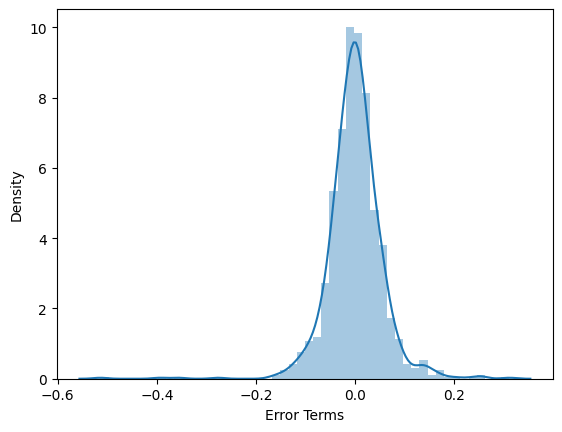

In [70]:
## check normality of error terms
y_res=y_train-y_pred_train

sns.distplot(y_res,kde=True)
plt.xlabel('Error Terms')
plt.show()

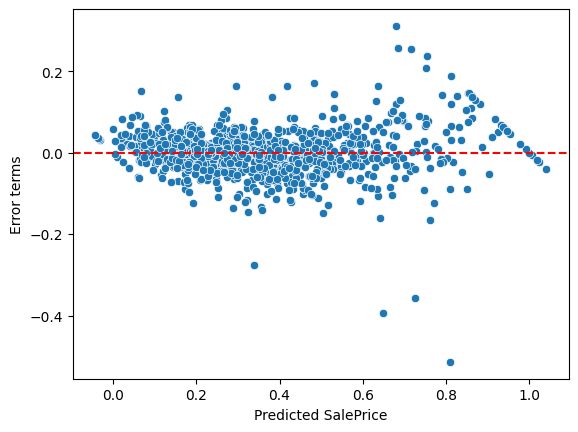

In [71]:
## we will plot scatter plot between y_pred_train and y_res , to check homoscedasticity of error terms

sns.scatterplot(x=y_pred_train,y=y_res)
plt.axhline(color='red',linestyle='--' )
plt.xlabel('Predicted SalePrice')
plt.ylabel('Error terms')
plt.show()

Same as Ridge, Lasso Model is satisfying all necessary assumptions

#### Comparison matrix for Linear Regression, Ridge & Lasso

In [72]:
compare_matrix={'metric':['R2_score_train','R2_score_test','RMSE_train','RMSE_test'],'Linear_Regression':metric_1,'Ridge':metric_2
                ,'Lasso':metric_3}
x=pd.DataFrame(compare_matrix)
x

metric  Linear_Regression     Ridge     Lasso
0  R2_score_train       9.453384e-01  0.923920  0.930330
1   R2_score_test      -1.347256e+21  0.916089  0.915392
2      RMSE_train       4.986669e-02  0.058831  0.056298
3       RMSE_test       8.061969e+09  0.063625  0.063888

## Part-2 of assignment 

Question_1: double the value of alpha

In [73]:
## 1) Ridge regression

alpha = 14
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=14)

In [74]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

## R_squared and RMSE calculation
metric_2=[]

R2_train=r2_score(y_train,y_pred_train)
print('R-squared for training set',R2_train)
metric_2.append(R2_train)

R2_test=r2_score(y_test,y_pred_test)
print('R-squared for testing set',R2_test)
metric_2.append(R2_test)

RMSE_train=mean_squared_error(y_train,y_pred_train)
print('RMSE for training set',RMSE_train**0.5)
metric_2.append(RMSE_train**0.5)

RMSE_test=mean_squared_error(y_test,y_pred_test)
print('RMSE for testing set',RMSE_test**0.5)
metric_2.append(RMSE_test**0.5)

R-squared for training set 0.9162970795368753
R-squared for testing set 0.9152167729091798
RMSE for training set 0.06170774857769989
RMSE for testing set 0.06395448310950885


Here, our model has become more generalised, from previous ridge model as performance metric for training & testing is very near to each other

In [75]:
## print coefficients of Ridge model and also top 5 features with their coefficients
coefficients = ridge.coef_

# Create a dictionary mapping feature names to their coefficients
feature_coefficients = {feature: coefficient for feature, coefficient in zip(X_train.columns, coefficients)}

# Sort the features based on the absolute magnitude of their coefficients
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Select the top 5 features with their coefficients
top_5_features = sorted_features[:5]

print("Top 5 features with model coefficients:")
for feature, coefficient in top_5_features:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Top 5 features with model coefficients:
Feature: GrLivArea, Coefficient: 0.1063614921096599
Feature: OverallQual, Coefficient: 0.10308259743397988
Feature: 1stFlrSF, Coefficient: 0.08218592424893462
Feature: Neighborhood_StoneBr, Coefficient: 0.06098584261705463
Feature: TotalBsmtSF, Coefficient: 0.05806545830517974


Here, as we double the alpha model coefficients are more reduced towards zero, but top 4 features remained as it is

In [76]:
## 2) Lasso Regression

alpha = 0.0002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [77]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

## R_squared and RMSE calculation
metric_2=[]

R2_train=r2_score(y_train,y_pred_train)
print('R-squared for training set',R2_train)
metric_2.append(R2_train)

R2_test=r2_score(y_test,y_pred_test)
print('R-squared for testing set',R2_test)
metric_2.append(R2_test)

RMSE_train=mean_squared_error(y_train,y_pred_train)
print('RMSE for training set',RMSE_train**0.5)
metric_2.append(RMSE_train**0.5)

RMSE_test=mean_squared_error(y_test,y_pred_test)
print('RMSE for testing set',RMSE_test**0.5)
metric_2.append(RMSE_test**0.5)

R-squared for training set 0.9240120992197743
R-squared for testing set 0.9170054215721661
RMSE for training set 0.058795165784210505
RMSE for testing set 0.06327627187206299


In [78]:
## print coefficients of Lasso model and also top 5 features with their coefficients
coefficients = lasso.coef_

# Create a dictionary mapping feature names to their coefficients
feature_coefficients = {feature: coefficient for feature, coefficient in zip(X_train.columns, coefficients)}

# Sort the features based on the absolute magnitude of their coefficients
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Select the top 5 features with their coefficients
top_5_features = sorted_features[:5]

print("Top 5 features with model coefficients:")
for feature, coefficient in top_5_features:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Top 5 features with model coefficients:
Feature: GrLivArea, Coefficient: 0.32452627621052205
Feature: OverallQual, Coefficient: 0.14603559297326138
Feature: Condition2_PosN, Coefficient: -0.13926371571610158
Feature: Neighborhood_StoneBr, Coefficient: 0.10192045976980768
Feature: Neighborhood_NoRidge, Coefficient: 0.07716179924003574


Question 3: Remove top 5 predictor variables from X_train and again train lasso 

Top 5 features with model coefficients:
Feature: GrLivArea, Coefficient: 0.3180319527556738
Feature: Condition2_PosN, Coefficient: -0.22019165420794298
Feature: OverallQual, Coefficient: 0.13865455939972335
Feature: RoofMatl_WdShngl, Coefficient: 0.1363266914811524
Feature: Neighborhood_StoneBr, Coefficient: 0.10653947258277054

In [79]:
X_train=X_train.drop(['GrLivArea','Condition2_PosN','OverallQual','RoofMatl_WdShngl','Neighborhood_StoneBr'],axis=1)

In [80]:
X_train.shape

(1022, 249)

In [81]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [82]:
## print coefficients of Lasso model and also top 5 features with their coefficients
coefficients = lasso.coef_

# Create a dictionary mapping feature names to their coefficients
feature_coefficients = {feature: coefficient for feature, coefficient in zip(X_train.columns, coefficients)}

# Sort the features based on the absolute magnitude of their coefficients
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Select the top 5 features with their coefficients
top_5_features = sorted_features[:5]

print("Top 5 features with model coefficients:")
for feature, coefficient in top_5_features:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Top 5 features with model coefficients:
Feature: 1stFlrSF, Coefficient: 0.2463032111862878
Feature: 2ndFlrSF, Coefficient: 0.21006244083996206
Feature: TotalBsmtSF, Coefficient: 0.12507648663953408
Feature: Condition2_Norm, Coefficient: 0.1080618614478067
Feature: LandContour_HLS, Coefficient: 0.10045941943134173
